In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('weatherAUS.csv')

df = pd.DataFrame(data)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [3]:
df2 = df[df['Location']=='Sydney']
df3 = df[df['Location']=='Albury']
df4 = df[df['Location']=='Melbourne']

In [4]:
df2.sort_values(by='Date' , inplace = True)
df2.insert(1 , 'Ranged_Date' , range(0,3344))

C:\Users\Ehsan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [5]:
df3.sort_values(by='Date' , inplace = True)
df3.insert(1 , 'Ranged_Date' , range(0,3040))

In [6]:
df4.sort_values(by='Date' , inplace = True)
df4.insert(1 , 'Ranged_Date' , range(0,3193))

In [7]:
df4

,Date,Ranged_Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67384,1/1/2009,0,Melbourne,14.7,20.4,0.0,SW,69.0,W,SW,33.0,43.0,68.0,39.0,1005.4,1006.5,15.9,19.6,No,No
67749,1/1/2010,1,Melbourne,19.2,20.8,10.6,NNE,63.0,SSE,S,11.0,15.0,91.0,77.0,1010.8,1009.2,19.2,19.7,Yes,Yes
68114,1/1/2011,2,Melbourne,17.1,23.1,0.0,NaN,NaN,WSW,WSW,17.0,17.0,68.0,51.0,1012.3,1012.4,17.6,21.7,No,No
68449,1/1/2012,3,Melbourne,18.3,33.9,0.0,NaN,NaN,NE,S,7.0,24.0,69.0,38.0,1014.9,1011.4,22.3,32.8,No,No
68784,1/1/2013,4,Melbourne,15.4,25.3,0.0,SSW,50.0,SSW,SSE,7.0,20.0,63.0,47.0,1013.7,1011.8,18.1,24.3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68701,9/9/2012,3188,Melbourne,10.1,19.0,NaN,SW,33.0,WSW,WSW,15.0,9.0,70.0,38.0,1025.6,1023.8,11.8,18.7,NaN,Yes
69007,9/9/2013,3189,Melbourne,11.5,22.9,0.2,N,81.0,N,N,56.0,50.0,38.0,40.0,1012.0,1003.2,16.3,21.7,No,No
69372,9/9/2014,3190,Melbourne,15.6,20.4,0.0,N,83.0,N,NW,57.0,19.0,67.0,59.0,1005.0,1002.0,16.2,19.0,No,Yes
69737,9/9/2015,3191,Melbourne,NaN,NaN,NaN,SSW,39.0,SW,SSW,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2.isnull().sum()

Date                0
Ranged_Date         0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
dtype: int64

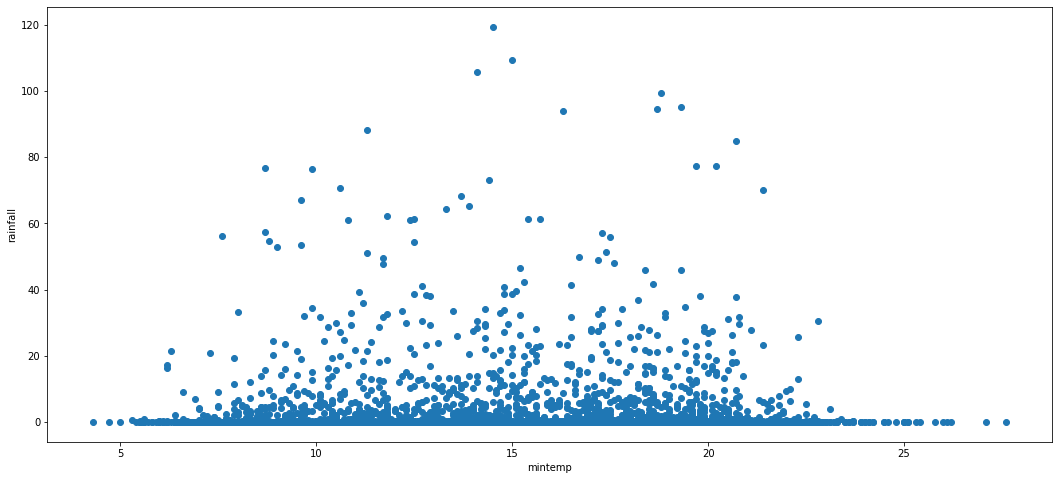

In [9]:
plt.figure(figsize=(18,8))
plt.xlabel('mintemp')
plt.ylabel('rainfall')
plt.scatter(df2['MinTemp'] ,df2['Rainfall'])

###noise in mintemp>27

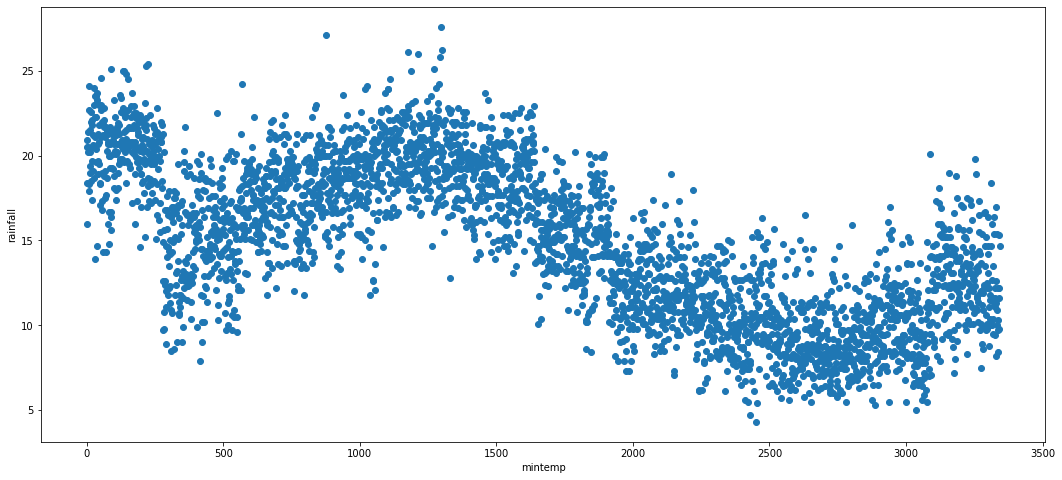

In [10]:
plt.figure(figsize=(18,8))
plt.xlabel('mintemp')
plt.ylabel('rainfall')
plt.scatter(df2['Ranged_Date'] ,df2['MinTemp'])

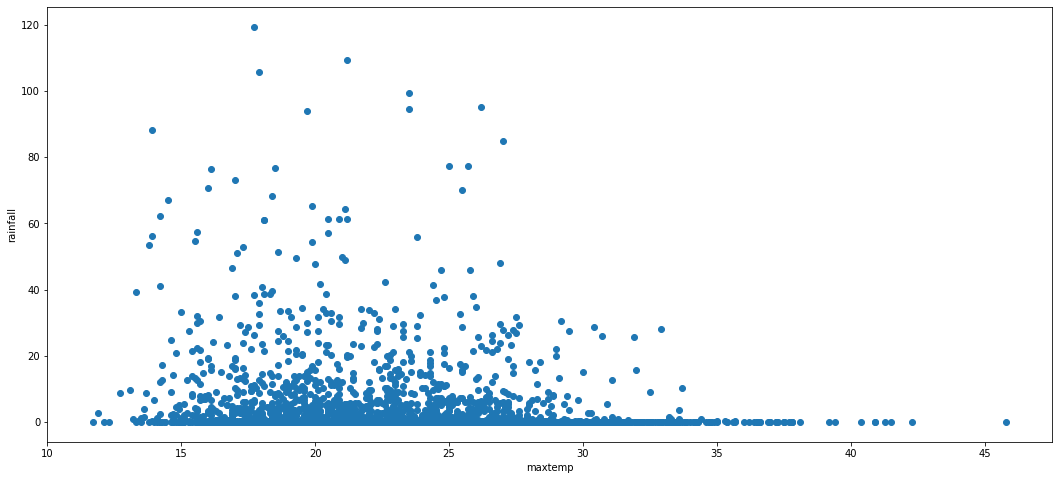

In [11]:
plt.figure(figsize=(18,8))
plt.xlabel('maxtemp')
plt.ylabel('rainfall')
plt.scatter(df2['MaxTemp'] ,df2['Rainfall'])

##noise in max temp >45

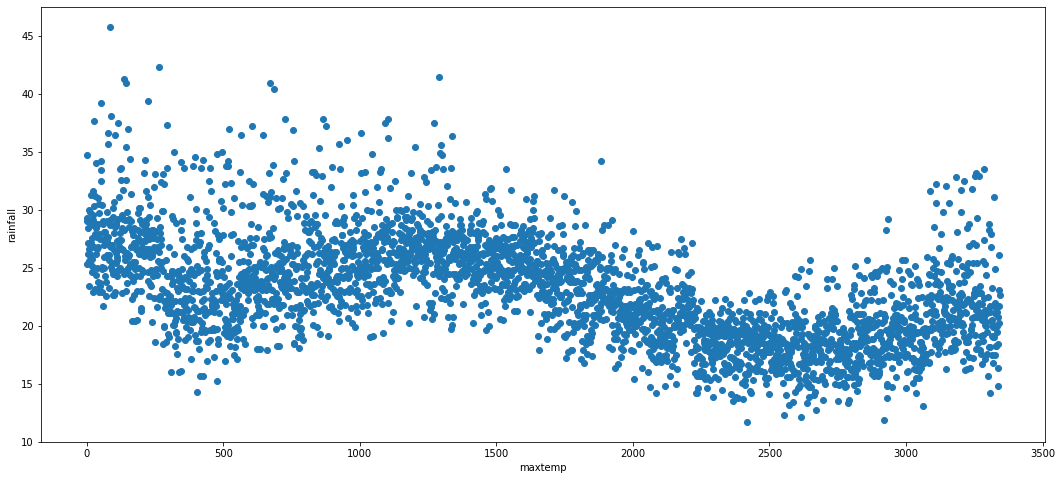

In [12]:
plt.figure(figsize=(18,8))
plt.xlabel('maxtemp')
plt.ylabel('rainfall')
plt.scatter(df2['Ranged_Date'] ,df2['MaxTemp'])

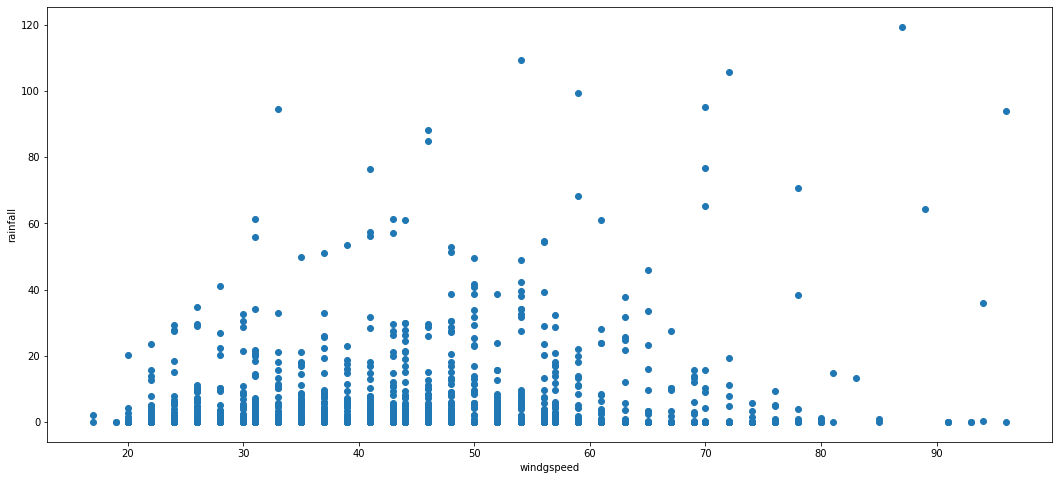

In [13]:
plt.figure(figsize=(18,8))
plt.xlabel('windgspeed')
plt.ylabel('rainfall')
plt.scatter(df2['WindGustSpeed'] ,df2['Rainfall'])

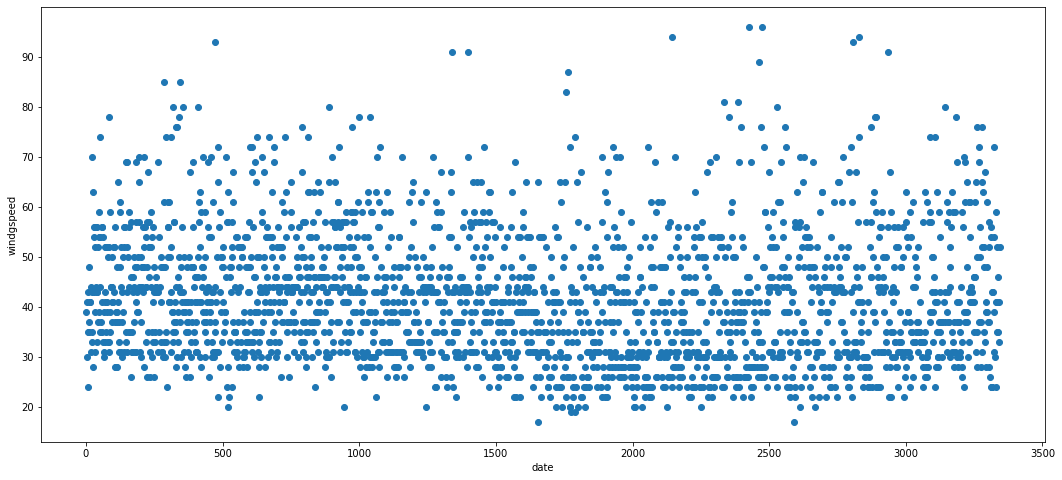

In [14]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('windgspeed')
plt.scatter(df2['Ranged_Date'] ,df2['WindGustSpeed'])

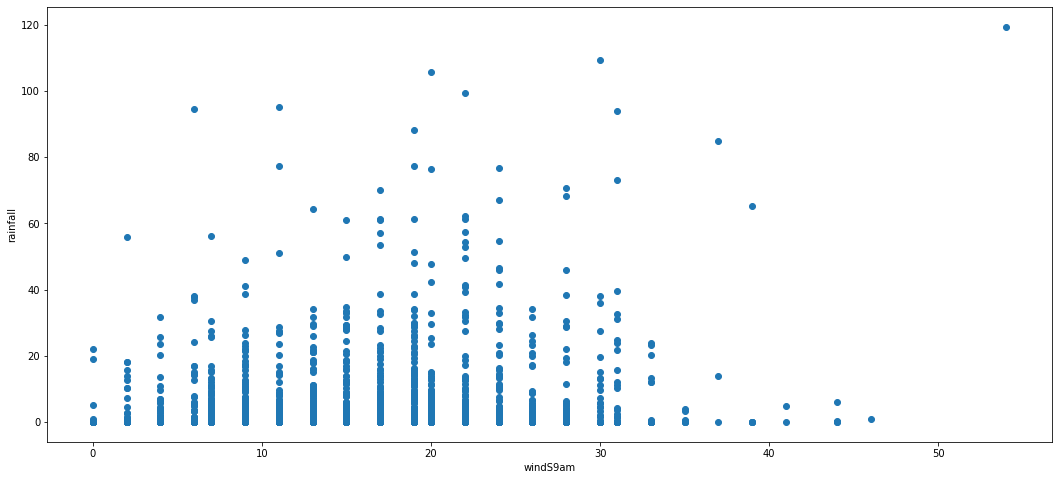

In [15]:
plt.figure(figsize=(18,8))
plt.xlabel('windS9am')
plt.ylabel('rainfall')
plt.scatter(df2['WindSpeed9am'] ,df2['Rainfall'])

##noise in windspeed9am >50

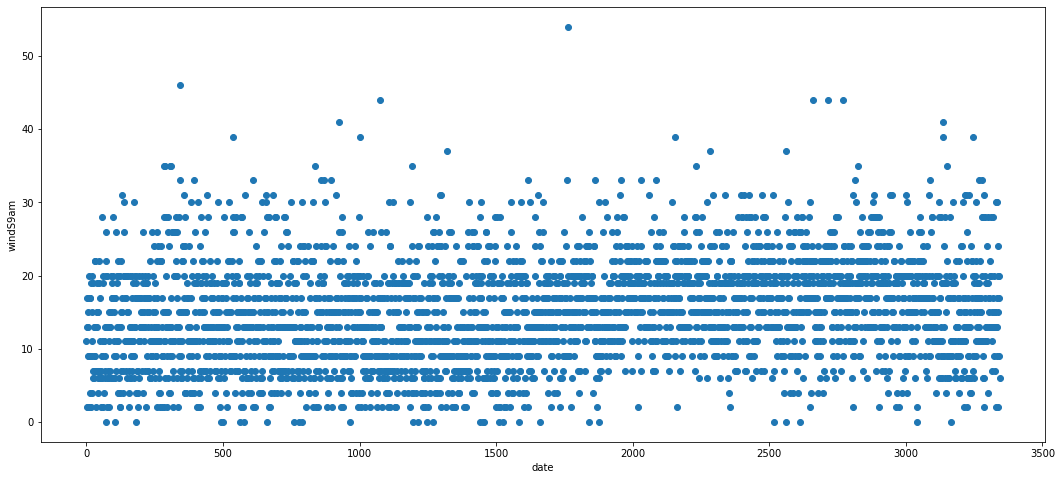

In [16]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('windS9am')
plt.scatter(df2['Ranged_Date'] ,df2['WindSpeed9am'])

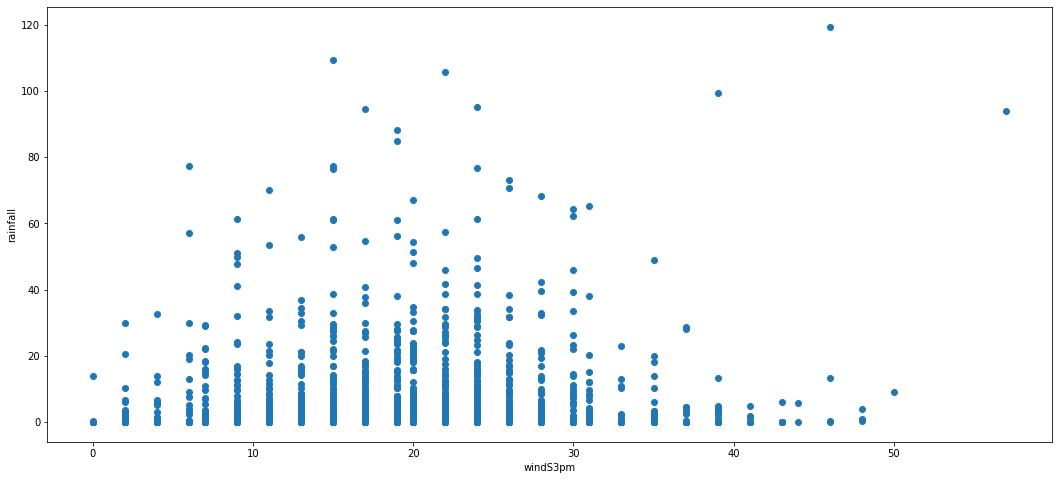

In [17]:
plt.figure(figsize=(18,8))
plt.xlabel('windS3pm')
plt.ylabel('rainfall')
plt.scatter(df2['WindSpeed3pm'] ,df2['Rainfall'])

##noise in windspeed3pm > 50

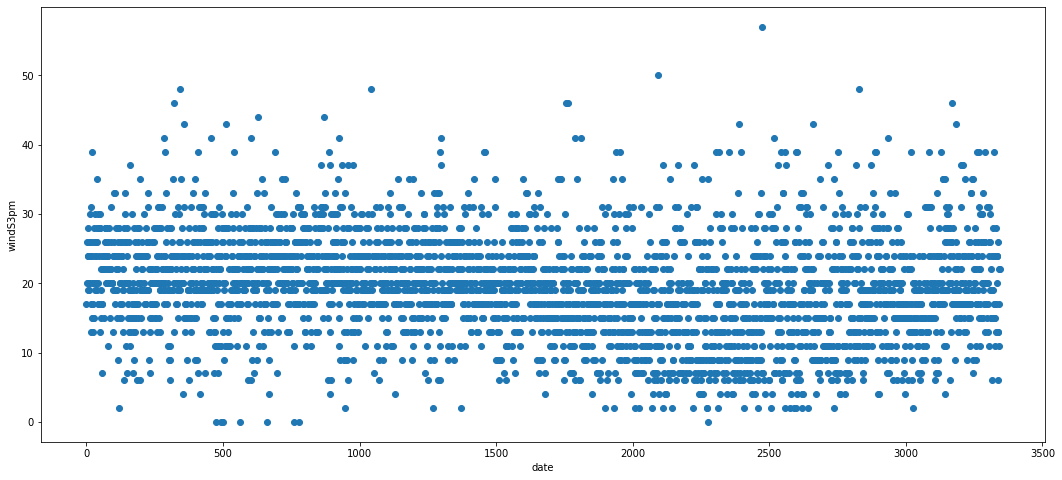

In [18]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('windS3pm')
plt.scatter(df2['Ranged_Date'] ,df2['WindSpeed3pm'])

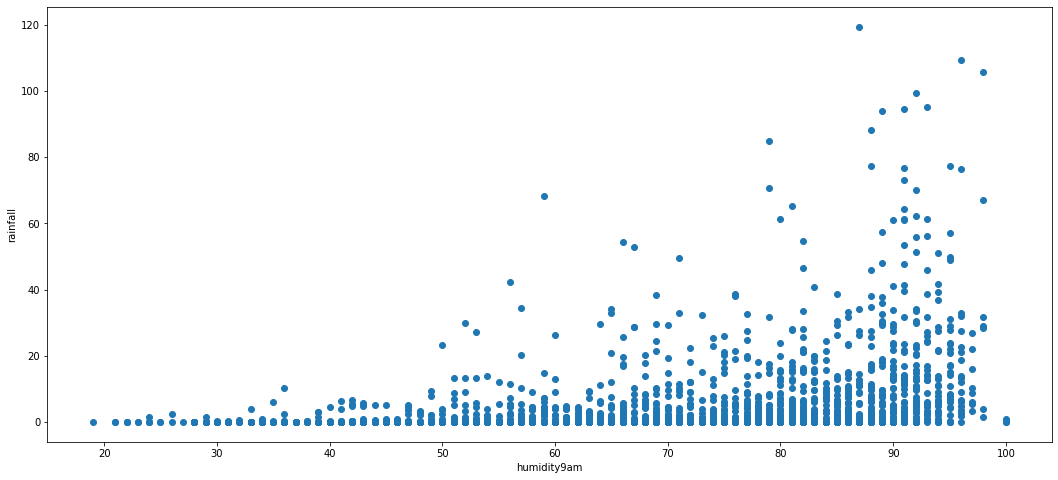

In [19]:
plt.figure(figsize=(18,8))
plt.xlabel('humidity9am')
plt.ylabel('rainfall')
plt.scatter(df2['Humidity9am'] ,df2['Rainfall'])

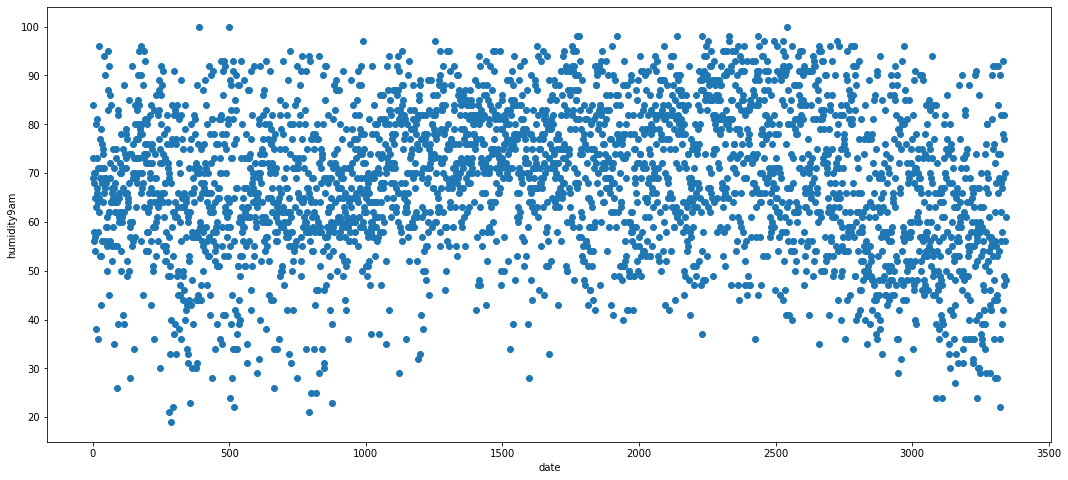

In [20]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('humidity9am')
plt.scatter(df2['Ranged_Date'] ,df2['Humidity9am'])

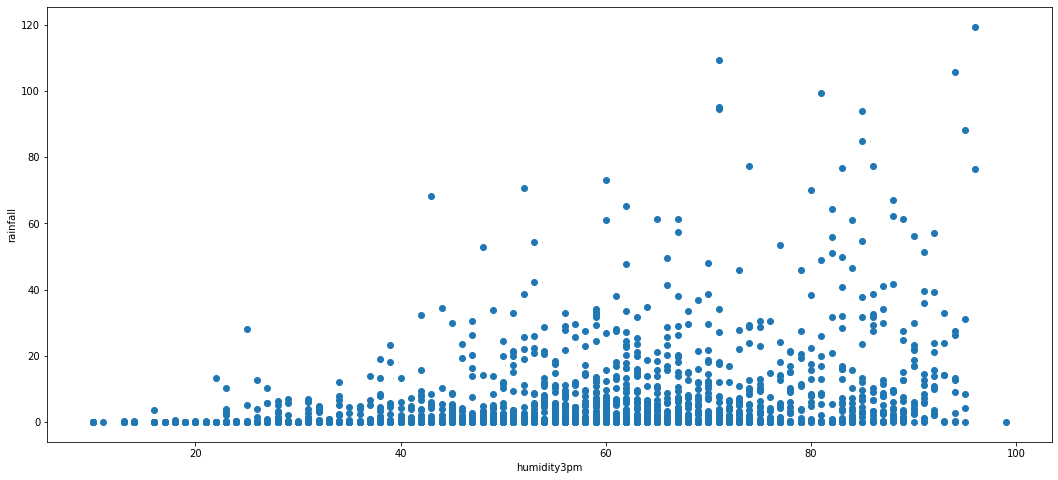

In [21]:
plt.figure(figsize=(18,8))
plt.xlabel('humidity3pm')
plt.ylabel('rainfall')
plt.scatter(df2['Humidity3pm'] ,df2['Rainfall'])

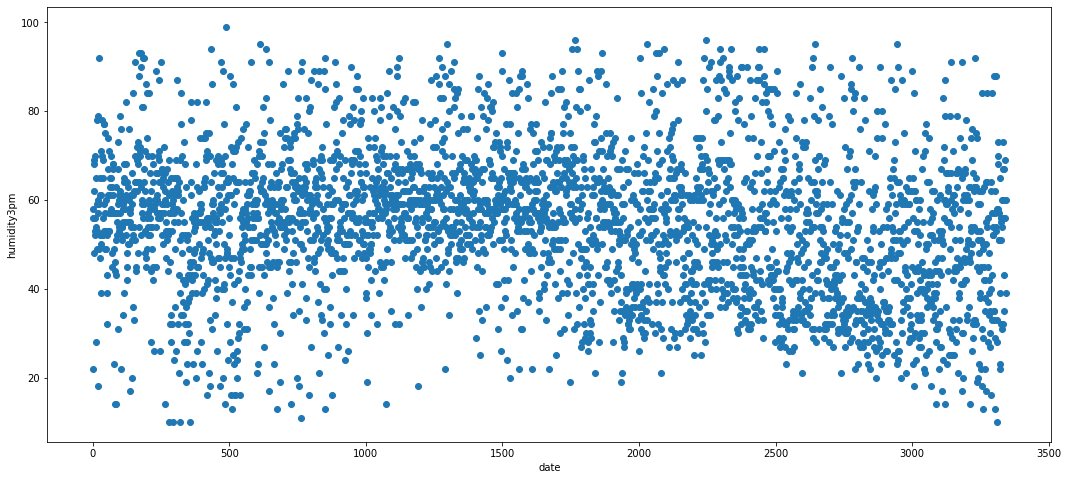

In [22]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('humidity3pm')
plt.scatter(df2['Ranged_Date'] ,df2['Humidity3pm'])

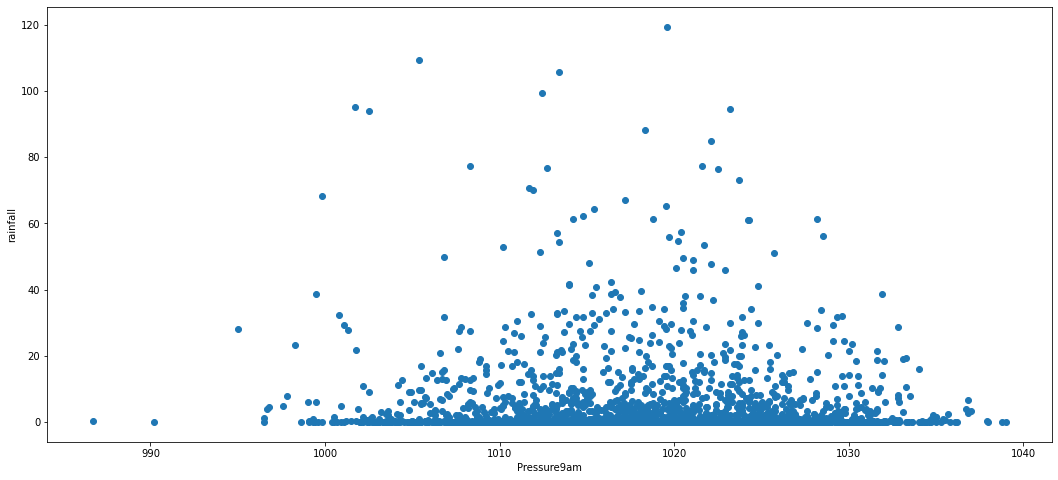

In [23]:
plt.figure(figsize=(18,8))
plt.xlabel('Pressure9am')
plt.ylabel('rainfall')
plt.scatter(df2['Pressure9am'] ,df2['Rainfall'])

##noise in pre9am < 990

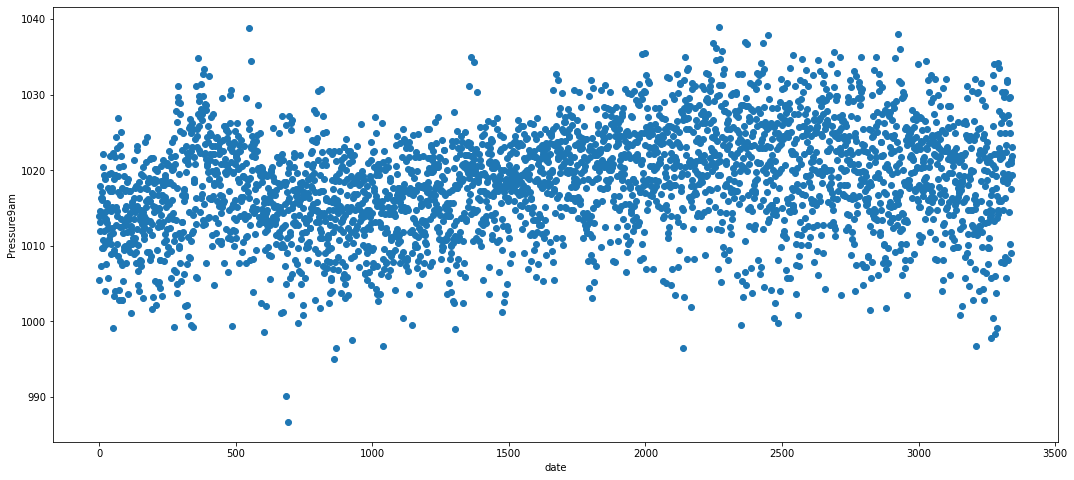

In [24]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('Pressure9am')
plt.scatter(df2['Ranged_Date'] ,df2['Pressure9am'])

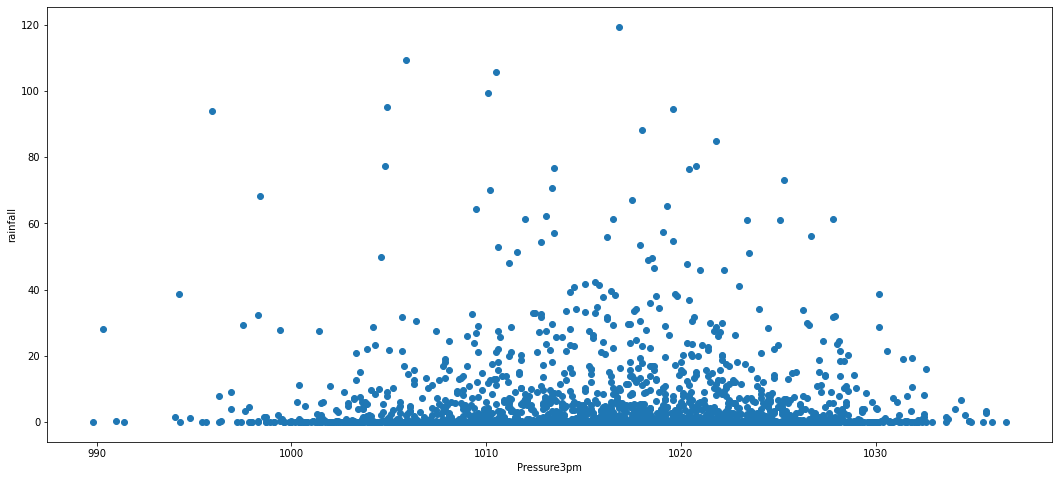

In [25]:
plt.figure(figsize=(18,8))
plt.xlabel('Pressure3pm')
plt.ylabel('rainfall')
plt.scatter(df2['Pressure3pm'] ,df2['Rainfall'])

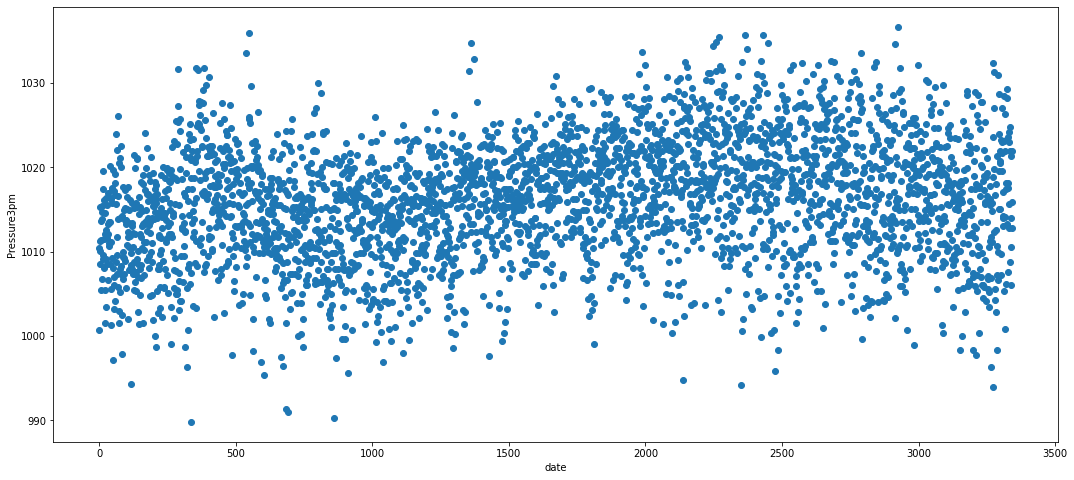

In [26]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('Pressure3pm')
plt.scatter(df2['Ranged_Date'] ,df2['Pressure3pm'])

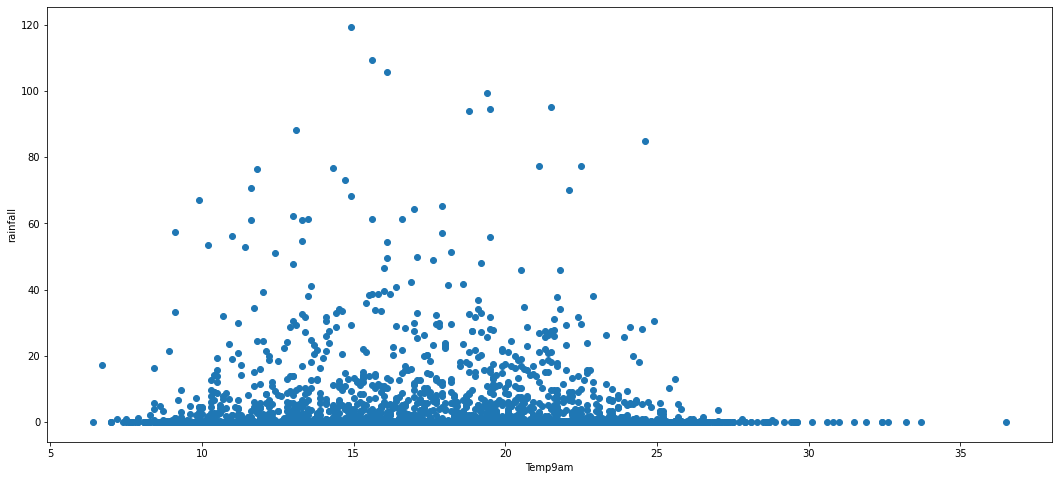

In [27]:
plt.figure(figsize=(18,8))
plt.xlabel('Temp9am')
plt.ylabel('rainfall')
plt.scatter(df2['Temp9am'] ,df2['Rainfall'])

#noise in temp9am >35

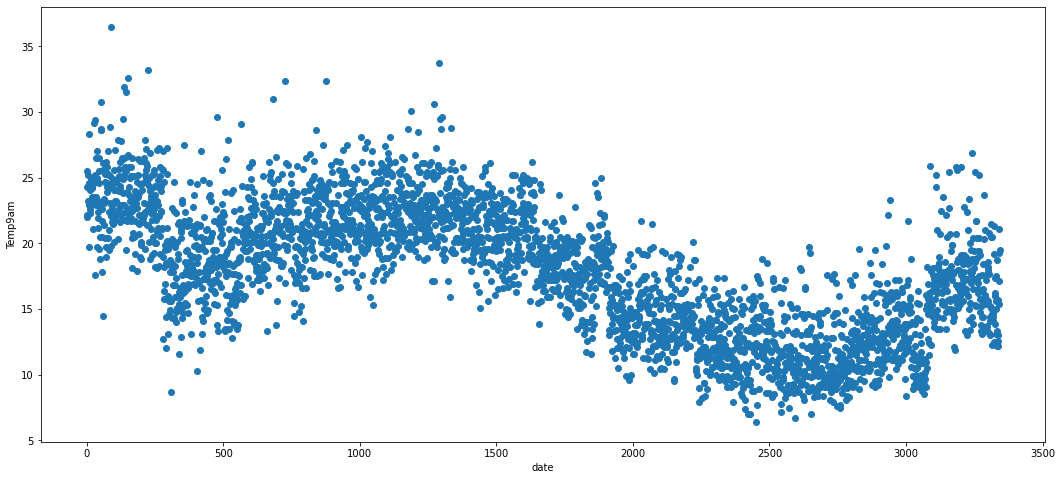

In [28]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('Temp9am')
plt.scatter(df2['Ranged_Date'] ,df2['Temp9am'])

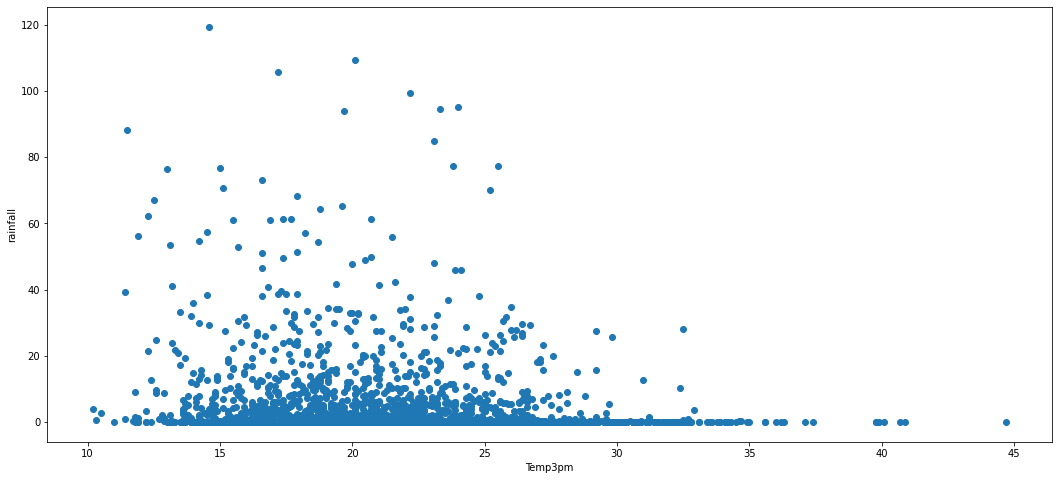

In [29]:
plt.figure(figsize=(18,8))
plt.xlabel('Temp3pm')
plt.ylabel('rainfall')
plt.scatter(df2['Temp3pm'] ,df2['Rainfall'])

##noise in temp3pm > 42

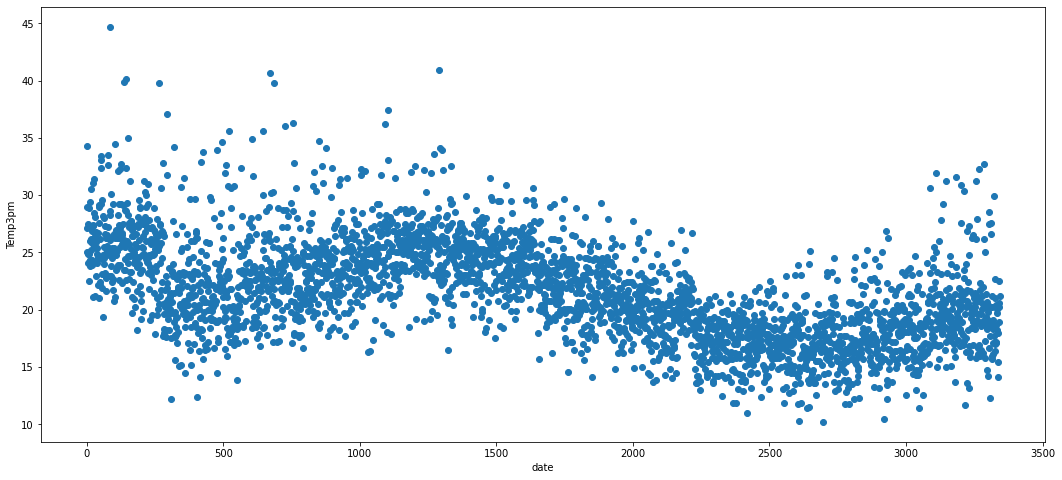

In [30]:
plt.figure(figsize=(18,8))
plt.xlabel('date')
plt.ylabel('Temp3pm')
plt.scatter(df2['Ranged_Date'] ,df2['Temp3pm'])

In [31]:
h = df2['MinTemp'].nlargest(3)
h

31277    27.6
33326    27.1
33380    26.2
Name: MinTemp, dtype: float64

In [32]:
df_sydney = df2[df2['MinTemp']<27]

In [33]:
h = df2['MaxTemp'].nlargest(3)
h

31928    45.8
31918    42.3
31276    41.5
Name: MaxTemp, dtype: float64

In [34]:
df_sydney = df2[df2['MaxTemp']<43]

In [35]:
h = df2['WindSpeed9am'].nlargest(3)
h

32723    54.0
31164    46.0
33321    44.0
Name: WindSpeed9am, dtype: float64

In [36]:
df_sydney = df2[df2['WindSpeed9am']<47]

In [37]:
h = df2['WindSpeed3pm'].nlargest(3)
h

33134    57.0
31021    50.0
31164    48.0
Name: WindSpeed3pm, dtype: float64

In [38]:
df_sydney = df2[df2['WindSpeed3pm']<51]

In [39]:
l = df2['Pressure9am'].nsmallest(3)
l


30472    986.7
30471    990.2
30492    995.0
Name: Pressure9am, dtype: float64

In [40]:
df_sydney = df2[df2['Pressure9am']>991]

In [41]:
h = df2['Temp9am'].nlargest(3)
h

33361    36.5
31276    33.7
33374    33.2
Name: Temp9am, dtype: float64

In [42]:
df_sydney = df2[df2['Temp9am']<33.8]

In [43]:
h = df2['Temp3pm'].nlargest(3)
h

31928    44.7
31276    40.9
32936    40.7
Name: Temp3pm, dtype: float64

In [44]:
df_sydney = df2[df2['Temp3pm']<41]

In [45]:
df_sydney.dropna()

,Date,Ranged_Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
31241,1/1/2011,2,Sydney,20.5,29.0,0.0,NE,39.0,E,ENE,13.0,20.0,69.0,58.0,1013.2,1010.1,25.5,27.1,No,No
31576,1/1/2012,3,Sydney,16.0,25.3,0.0,ENE,41.0,NNW,ENE,17.0,26.0,56.0,48.0,1017.9,1015.3,22.2,25.0,No,No
31911,1/1/2013,4,Sydney,20.2,26.2,0.0,E,30.0,ESE,E,9.0,19.0,70.0,68.0,1012.0,1008.6,23.2,24.1,No,No
32613,1/1/2015,6,Sydney,21.4,28.4,0.0,ENE,43.0,NE,NE,15.0,24.0,68.0,69.0,1014.5,1011.4,25.2,27.5,No,No
32978,1/1/2016,7,Sydney,17.9,25.6,0.0,E,35.0,SSW,E,2.0,28.0,57.0,52.0,1016.4,1013.7,22.9,24.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,9/8/2016,3334,Sydney,15.4,21.2,0.0,NE,41.0,N,NE,9.0,24.0,69.0,67.0,1029.7,1024.8,18.7,20.1,No,No
31462,9/9/2011,3338,Sydney,12.2,14.8,4.4,WSW,46.0,W,S,15.0,13.0,82.0,67.0,1009.0,1006.1,12.2,14.1,Yes,Yes
32134,9/9/2013,3340,Sydney,15.3,26.1,0.0,NNW,33.0,N,NE,9.0,11.0,70.0,69.0,1021.0,1014.0,21.1,22.5,No,No
32499,9/9/2014,3341,Sydney,12.2,23.1,0.0,NNE,41.0,NNW,NE,17.0,22.0,56.0,56.0,1019.4,1012.8,19.3,20.6,No,Yes


In [64]:
df_sydney2 = pd.DataFrame(df_sydney , columns=['Ranged_Date','MinTemp' , 'MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])
df_sydney2



,Ranged_Date,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall
31241,2,20.5,29.0,39.0,13.0,20.0,69.0,58.0,1013.2,1010.1,25.5,27.1,0.0
31576,3,16.0,25.3,41.0,17.0,26.0,56.0,48.0,1017.9,1015.3,22.2,25.0,0.0
31911,4,20.2,26.2,30.0,9.0,19.0,70.0,68.0,1012.0,1008.6,23.2,24.1,0.0
32613,6,21.4,28.4,43.0,15.0,24.0,68.0,69.0,1014.5,1011.4,25.2,27.5,0.0
32978,7,17.9,25.6,35.0,2.0,28.0,57.0,52.0,1016.4,1013.7,22.9,24.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,3334,15.4,21.2,41.0,9.0,24.0,69.0,67.0,1029.7,1024.8,18.7,20.1,0.0
31462,3338,12.2,14.8,46.0,15.0,13.0,82.0,67.0,1009.0,1006.1,12.2,14.1,4.4
32134,3340,15.3,26.1,33.0,9.0,11.0,70.0,69.0,1021.0,1014.0,21.1,22.5,0.0
32499,3341,12.2,23.1,41.0,17.0,22.0,56.0,56.0,1019.4,1012.8,19.3,20.6,0.0


In [65]:
df_sydney2.dropna(inplace=True)

In [66]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm , columns=['Ranged_Date','MinTemp' , 'MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall
0,0.000000,0.685841,0.565359,0.278481,0.240741,0.350877,0.617284,0.539326,0.392941,0.432836,0.630872,0.549020,0.000000
1,0.000299,0.486726,0.444444,0.303797,0.314815,0.456140,0.456790,0.426966,0.503529,0.543710,0.520134,0.480392,0.000000
2,0.000599,0.672566,0.473856,0.164557,0.166667,0.333333,0.629630,0.651685,0.364706,0.400853,0.553691,0.450980,0.000000
3,0.001197,0.725664,0.545752,0.329114,0.277778,0.421053,0.604938,0.662921,0.423529,0.460554,0.620805,0.562092,0.000000
4,0.001497,0.570796,0.454248,0.227848,0.037037,0.491228,0.469136,0.471910,0.468235,0.509595,0.543624,0.454248,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.303797,0.166667,0.421053,0.617284,0.640449,0.781176,0.746269,0.402685,0.320261,0.000000
2267,0.998503,0.318584,0.101307,0.367089,0.277778,0.228070,0.777778,0.640449,0.294118,0.347548,0.184564,0.124183,0.036851
2268,0.999102,0.455752,0.470588,0.202532,0.166667,0.192982,0.629630,0.662921,0.576471,0.515991,0.483221,0.398693,0.000000
2269,0.999401,0.318584,0.372549,0.303797,0.314815,0.385965,0.456790,0.516854,0.538824,0.490405,0.422819,0.336601,0.000000


In [170]:
x = pd.DataFrame(norm_df , columns = ['Ranged_Date','MinTemp' , 'MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'])
y = norm_df['Rainfall'].values.reshape(-1,1)

In [171]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [172]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [173]:
y_pred = regressor.predict(x_test)
y_pred

array([[-7.83787868e-03],
       [ 4.79685877e-02],
       [-4.06162465e-02],
       [ 3.79393714e-02],
       [ 3.35459362e-02],
       [ 5.70485393e-02],
       [ 5.38827222e-02],
       [ 3.86486713e-03],
       [ 4.48162305e-03],
       [ 1.17112566e-02],
       [ 2.90252218e-02],
       [ 3.58585910e-02],
       [ 5.50628395e-02],
       [ 1.34616863e-02],
       [-4.31836969e-02],
       [ 5.06178843e-03],
       [ 1.31340464e-02],
       [ 3.07107382e-02],
       [ 6.64927087e-02],
       [ 1.30956751e-01],
       [-1.41486707e-02],
       [ 2.40663487e-02],
       [-2.14869496e-02],
       [ 7.58041052e-02],
       [ 2.46538602e-02],
       [ 3.50719851e-02],
       [ 8.31652118e-02],
       [ 1.73523890e-02],
       [ 7.13073312e-02],
       [ 1.44858160e-02],
       [-4.95163632e-03],
       [ 9.00035819e-03],
       [ 4.23985144e-02],
       [ 2.40398089e-02],
       [ 1.31143460e-02],
       [ 4.63591574e-02],
       [ 6.74241362e-02],
       [ 1.23241624e-02],
       [ 1.2

In [174]:
x_test.insert(3 ,'y_test' ,y_test)
x_test.insert(4,'y_pred' ,y_pred)
x_test

,Ranged_Date,MinTemp,MaxTemp,y_test,y_pred,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
979,0.412152,0.778761,0.522876,0.000000,-0.007838,0.164557,0.203704,0.350877,0.543210,0.595506,0.564706,0.599147,0.640940,0.519608
633,0.262197,0.663717,0.454248,0.000000,0.047969,0.329114,0.203704,0.421053,0.641975,0.662921,0.336471,0.360341,0.580537,0.470588
478,0.197845,0.384956,0.385621,0.020101,-0.040616,0.493671,0.518519,0.385965,0.086420,0.146067,0.503529,0.599147,0.338926,0.375817
69,0.027537,0.730088,0.428105,0.000000,0.037939,0.417722,0.351852,0.350877,0.567901,0.550562,0.392941,0.511727,0.536913,0.395425
547,0.226878,0.384956,0.222222,0.013400,0.033546,0.177215,0.111111,0.298246,0.777778,0.539326,0.574118,0.646055,0.295302,0.245098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.765340,0.137168,0.169935,0.040201,0.153649,0.746835,0.277778,0.684211,0.950617,0.348315,0.103529,0.279318,0.063758,0.202614
1685,0.725831,0.119469,0.183007,0.020101,0.035032,0.367089,0.574074,0.228070,0.469136,0.292135,0.621176,0.710021,0.097315,0.215686
1489,0.638432,0.451327,0.379085,0.000000,-0.007635,0.113924,0.277778,0.298246,0.543210,0.483146,0.545882,0.586354,0.369128,0.359477
1455,0.623466,0.318584,0.225490,0.115578,0.085765,0.531646,0.444444,0.421053,0.716049,0.303371,0.376471,0.405117,0.302013,0.264706


In [175]:
df_sc = x_test.sort_values(by='Ranged_Date')
df_sc

,Ranged_Date,MinTemp,MaxTemp,y_test,y_pred,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
1,0.000299,0.486726,0.444444,0.000000,0.019549,0.303797,0.314815,0.456140,0.456790,0.426966,0.503529,0.543710,0.520134,0.480392
6,0.002694,0.730088,0.473856,0.045226,0.078527,0.392405,0.370370,0.456140,0.753086,0.617978,0.468235,0.530917,0.583893,0.513072
10,0.004190,0.597345,0.503268,0.000000,0.013114,0.303797,0.166667,0.456140,0.592593,0.483146,0.562353,0.590618,0.543624,0.519608
11,0.004490,0.778761,0.640523,0.003350,0.000249,0.177215,0.166667,0.298246,0.666667,0.438202,0.364706,0.390192,0.607383,0.660131
14,0.005986,0.716814,0.584967,0.000000,-0.002139,0.329114,0.074074,0.263158,0.530864,0.550562,0.320000,0.334755,0.614094,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.982341,0.318584,0.297386,0.006700,0.032915,0.582278,0.518519,0.578947,0.296296,0.191011,0.171765,0.277186,0.305369,0.323529
2233,0.982939,0.327434,0.513072,0.000000,-0.036250,0.227848,0.111111,0.298246,0.333333,0.280899,0.472941,0.445629,0.456376,0.519608
2246,0.988626,0.168142,0.212418,0.036851,0.077572,0.443038,0.314815,0.456140,0.654321,0.528090,0.595294,0.680171,0.218121,0.209150
2249,0.990422,0.429204,0.493464,0.000000,-0.008939,0.493671,0.370370,0.263158,0.308642,0.202247,0.543529,0.522388,0.463087,0.532680


Text(0, 0.5, 'Rainfall')

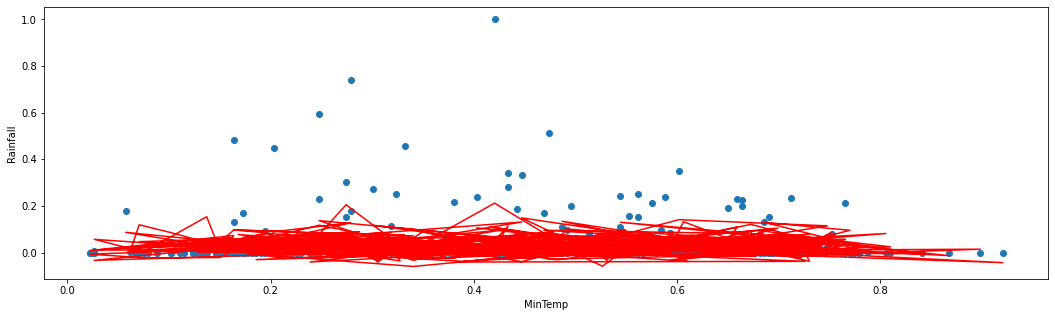

In [176]:
plt.figure(figsize=(18,5))
plt.scatter(df_sc['MinTemp'],df_sc['y_test'])
plt.plot(df_sc['MinTemp'],df_sc['y_pred'] , color="red")
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')

In [177]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.044277309073340626
R2 score is : 0.2551487532373622


In [152]:
###############################################################
###############################################################

#R2 score with 80 20 -->  0.2551487532373622
# mae with 80 20 --> MAE is : 0.044277309073340626
#######################################################
#R2 score with 70 30 --> 0.2331241474513046
#MAE with 70 30 --> 0.04159347163253645
##################################
#######################################################
#R2 score with 90 10 --> 0.25391937248874663
#MAE with 90 10 --> 0.050097142193741784

In [163]:
print(regressor.intercept_ , regressor.coef_)

[-0.14768289] [[ 0.00251729 -0.15648737 -0.10720825  0.09248441  0.10062446 -0.00854385
   0.17080318  0.08230916 -0.17662387  0.13737687  0.1768083   0.09034884]]


In [182]:
x1 = float(input('please enter Ranged_Date:'))
x2 = float(input('please enter MinTemp:'))
x3 = float(input('please enter MaxTemp :'))
x4 = float(input('please enter WindGustSpeed :'))
x5 = float(input('please enter WindSpeed9am :'))
x6 = float(input('please enter WindSpeed3pm :'))
x7 = float(input('please enter Humidity9am :'))
x8 = float(input('please enter Humidity3pm :'))
x9 = float(input('please enter Pressure9am :'))
x10 = float(input('please enter Pressure3pm :'))
x11 = float(input('please enter Temp9am :'))
x12 = float(input('please enter Temp3pm :'))

y = (-0.14768289) + (0.00251729*x1) + (-0.15648737*x2) + (-0.10720825*x3) +(0.09248441*x4)+(0.10062446*x5)+(-0.00854385*x6)+(0.17080318*x7)+(0.08230916*x8)+(-0.17662387*x9)+(0.13737687*x10)+(0.1768083*x11)+(0.09034884*x12)

y

please enter Ranged_Date:0.982939
please enter MinTemp:0.327434
please enter MaxTemp :0.513072
please enter WindGustSpeed :0.227848
please enter WindSpeed9am :0.111111
please enter WindSpeed3pm :0.298246
please enter Humidity9am :0.333333
please enter Humidity3pm :0.280899
please enter Pressure9am :0.472941
please enter Pressure3pm :0.456376
please enter Temp9am :0.456376
please enter Temp3pm :0.519608


-0.03489390246888004

In [217]:
df_sydney2.insert(14 , "Temp9am^2" , (df_sydney['Temp9am']**2))

In [218]:
df_sydney2.insert(15 , "Temp3pm^2" , (df_sydney['Temp3pm']**2))

In [220]:
df_sydney2.dropna(inplace=True)

In [229]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm , columns=['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.278481,0.240741,0.350877,0.617284,0.539326,0.392941,0.432836,0.630872,0.549020,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.303797,0.314815,0.456140,0.456790,0.426966,0.503529,0.543710,0.520134,0.480392,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.164557,0.166667,0.333333,0.629630,0.651685,0.364706,0.400853,0.553691,0.450980,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.329114,0.277778,0.421053,0.604938,0.662921,0.423529,0.460554,0.620805,0.562092,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.227848,0.037037,0.491228,0.469136,0.471910,0.468235,0.509595,0.543624,0.454248,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.303797,0.166667,0.421053,0.617284,0.640449,0.781176,0.746269,0.402685,0.320261,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.367089,0.277778,0.228070,0.777778,0.640449,0.294118,0.347548,0.184564,0.124183,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.202532,0.166667,0.192982,0.629630,0.662921,0.576471,0.515991,0.483221,0.398693,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.303797,0.314815,0.385965,0.456790,0.516854,0.538824,0.490405,0.422819,0.336601,0.254474,0.203144,0.000000


In [230]:
x = pd.DataFrame(norm_df , columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm' ,'Temp9am^2','Temp3pm^2'])
y = norm_df['Rainfall'].values.reshape(-1,1)

In [231]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [232]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [233]:
y_pred = regressor.predict(x_test)
y_pred

array([[-3.30720780e-02],
       [ 3.41265800e-02],
       [-3.11167179e-02],
       [ 2.58570541e-02],
       [ 4.59091353e-02],
       [ 6.57630770e-02],
       [ 6.34186392e-02],
       [-3.13541750e-03],
       [ 4.88375255e-03],
       [ 9.35165854e-03],
       [ 3.99210460e-02],
       [ 3.88185522e-02],
       [ 5.00609171e-02],
       [ 1.01718309e-02],
       [-8.03091658e-02],
       [ 1.30288614e-02],
       [ 2.24214625e-02],
       [ 4.79627486e-02],
       [ 5.70561158e-02],
       [ 1.48088876e-01],
       [-7.27888368e-03],
       [ 2.48636299e-02],
       [-1.06075834e-02],
       [ 8.41360117e-02],
       [ 1.25907106e-03],
       [ 2.40150979e-02],
       [ 7.78251486e-02],
       [-8.83464674e-03],
       [ 5.80766214e-02],
       [-2.75555115e-02],
       [-1.23942786e-02],
       [ 1.65645532e-02],
       [ 3.22127835e-02],
       [ 3.22091425e-02],
       [ 1.03290162e-02],
       [ 4.66505769e-02],
       [ 5.57237370e-02],
       [ 1.86232274e-02],
       [ 1.1

In [234]:
x_test.insert(5 ,'y_test' ,y_test)
x_test.insert(6,'y_pred' ,y_pred)
x_test

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Temp9am^2,Temp3pm^2
979,0.412152,0.778761,0.522876,0.659319,0.381506,0.000000,-0.033072,0.164557,0.203704,0.350877,0.543210,0.595506,0.564706,0.599147,0.640940,0.519608,0.482188,0.370424
633,0.262197,0.663717,0.454248,0.508985,0.313768,0.000000,0.034127,0.329114,0.203704,0.421053,0.641975,0.662921,0.336471,0.360341,0.580537,0.470588,0.412557,0.321691
478,0.197845,0.384956,0.385621,0.220818,0.251368,0.020101,-0.031117,0.493671,0.518519,0.385965,0.086420,0.146067,0.503529,0.599147,0.338926,0.375817,0.184370,0.235620
69,0.027537,0.730088,0.428105,0.593477,0.289367,0.000000,0.025857,0.417722,0.351852,0.350877,0.567901,0.550562,0.392941,0.511727,0.536913,0.395425,0.365399,0.252547
547,0.226878,0.384956,0.222222,0.220818,0.124280,0.013400,0.045909,0.177215,0.111111,0.298246,0.777778,0.539326,0.574118,0.646055,0.295302,0.245098,0.151752,0.134517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.765340,0.137168,0.169935,0.055120,0.090002,0.040201,0.128699,0.746835,0.277778,0.684211,0.950617,0.348315,0.103529,0.279318,0.063758,0.202614,0.022581,0.106056
1685,0.725831,0.119469,0.183007,0.046542,0.098281,0.020101,0.019726,0.367089,0.574074,0.228070,0.469136,0.292135,0.621176,0.710021,0.097315,0.215686,0.036719,0.114583
1489,0.638432,0.451327,0.379085,0.279657,0.245703,0.000000,0.002605,0.113924,0.277778,0.298246,0.543210,0.483146,0.545882,0.586354,0.369128,0.359477,0.208489,0.221865
1455,0.623466,0.318584,0.225490,0.168087,0.126525,0.115578,0.094834,0.531646,0.444444,0.421053,0.716049,0.303371,0.376471,0.405117,0.302013,0.264706,0.156600,0.148380


In [235]:
df_sc = x_test.sort_values(by='Ranged_Date')
df_sc

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Temp9am^2,Temp3pm^2
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.000000,0.019357,0.303797,0.314815,0.456140,0.456790,0.426966,0.503529,0.543710,0.520134,0.480392,0.347960,0.331208
6,0.002694,0.730088,0.473856,0.593477,0.332577,0.045226,0.060470,0.392405,0.370370,0.456140,0.753086,0.617978,0.468235,0.530917,0.583893,0.513072,0.416294,0.363760
10,0.004190,0.597345,0.503268,0.430602,0.361607,0.000000,0.010329,0.303797,0.166667,0.456140,0.592593,0.483146,0.562353,0.590618,0.543624,0.519608,0.372483,0.370424
11,0.004490,0.778761,0.640523,0.659319,0.510046,0.003350,-0.008698,0.177215,0.166667,0.298246,0.666667,0.438202,0.364706,0.390192,0.607383,0.660131,0.442883,0.526042
14,0.005986,0.716814,0.584967,0.576090,0.447392,0.000000,-0.013093,0.329114,0.074074,0.263158,0.530864,0.550562,0.320000,0.334755,0.614094,0.555556,0.450620,0.407986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.982341,0.318584,0.297386,0.168087,0.178982,0.006700,0.039320,0.582278,0.518519,0.578947,0.296296,0.191011,0.171765,0.277186,0.305369,0.323529,0.159046,0.192727
2233,0.982939,0.327434,0.513072,0.174765,0.371502,0.000000,-0.029043,0.227848,0.111111,0.298246,0.333333,0.280899,0.472941,0.445629,0.456376,0.519608,0.285235,0.370424
2246,0.988626,0.168142,0.212418,0.071177,0.117617,0.036851,0.073735,0.443038,0.314815,0.456140,0.654321,0.528090,0.595294,0.680171,0.218121,0.209150,0.100477,0.110294
2249,0.990422,0.429204,0.493464,0.259365,0.351822,0.000000,-0.001186,0.493671,0.370370,0.263158,0.308642,0.202247,0.543529,0.522388,0.463087,0.532680,0.291573,0.383904


Text(0, 0.5, 'Rainfall')

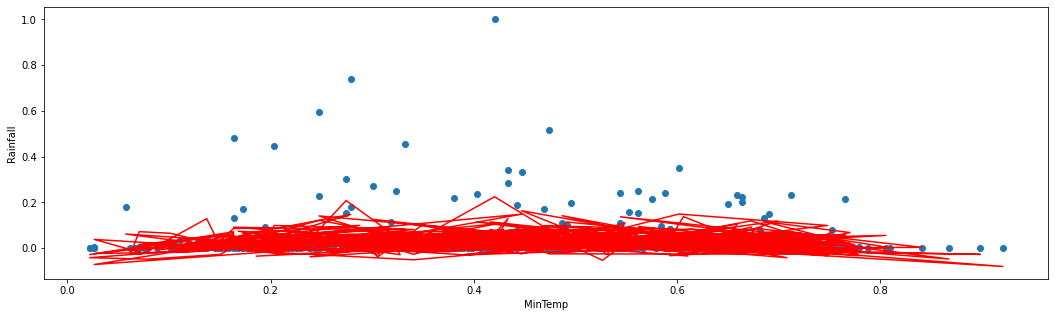

In [236]:
plt.figure(figsize=(18,5))
plt.scatter(df_sc['MinTemp'],df_sc['y_test'])
plt.plot(df_sc['MinTemp'],df_sc['y_pred'] , color="red")
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')

In [237]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.044359234427102455
R2 score is : 0.27610297404653306


In [238]:
###################
#R2 score with ^2 tepms --> 0.27610297404653306
#MAE with ^2 Temps --> 0.04435923442710245
#######################

In [241]:
SinMinTemp = np.sin((2*np.pi*df_sydney2.MinTemp)/365)
SinMaxTemp = np.sin((2*np.pi*df_sydney2.MaxTemp)/365)

SinTemp9am = np.sin((2*np.pi*df_sydney2.Temp9am)/365)
SinTemp3pm = np.sin((2*np.pi*df_sydney2.Temp3pm)/365)


In [243]:
df_sydney2.insert(5,"SinMinTemp" , SinMinTemp)
df_sydney2.insert(6,"SinMaxTemp" , SinMaxTemp)
df_sydney2.insert(16,"SinTemp9am" , SinTemp9am)
df_sydney2.insert(17,"SinTemp3pm" , SinTemp3pm)

In [245]:
df_sydney2.dropna(inplace=True)

In [258]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','SinMinTemp','SinMaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,SinMinTemp,SinMaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.698967,0.598745,0.278481,0.240741,0.350877,...,0.539326,0.392941,0.432836,0.630872,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.500691,0.476601,0.303797,0.314815,0.456140,...,0.426966,0.503529,0.543710,0.520134,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.685909,0.506669,0.164557,0.166667,0.333333,...,0.651685,0.364706,0.400853,0.553691,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.737990,0.579209,0.329114,0.277778,0.421053,...,0.662921,0.423529,0.460554,0.620805,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.585012,0.486648,0.227848,0.037037,0.491228,...,0.471910,0.468235,0.509595,0.543624,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.473896,0.336979,0.303797,0.166667,0.421053,...,0.640449,0.781176,0.746269,0.402685,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.329790,0.111668,0.367089,0.277778,0.228070,...,0.640449,0.294118,0.347548,0.184564,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.469423,0.503339,0.202532,0.166667,0.192982,...,0.662921,0.576471,0.515991,0.483221,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.329790,0.402199,0.303797,0.314815,0.385965,...,0.516854,0.538824,0.490405,0.422819,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [259]:
x = pd.DataFrame(norm_df , columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','SinMinTemp','SinMaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'])
y = norm_df['Rainfall'].values.reshape(-1,1)

In [260]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [261]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [262]:
y_pred = regressor.predict(x_test)
y_pred

array([[-3.74457055e-02],
       [ 3.21387438e-02],
       [-3.02435618e-02],
       [ 2.40680915e-02],
       [ 4.81149211e-02],
       [ 7.05015474e-02],
       [ 6.61968226e-02],
       [-7.28806558e-03],
       [ 4.24004796e-04],
       [ 8.12927486e-03],
       [ 3.96995553e-02],
       [ 3.92886146e-02],
       [ 4.99653606e-02],
       [ 1.06274860e-02],
       [-8.59368516e-02],
       [ 1.37427040e-02],
       [ 2.46116900e-02],
       [ 4.87293807e-02],
       [ 5.22003398e-02],
       [ 1.50514058e-01],
       [-6.04997361e-03],
       [ 2.63104104e-02],
       [-9.64631095e-03],
       [ 8.31890116e-02],
       [-5.96025392e-03],
       [ 2.26448134e-02],
       [ 8.02904974e-02],
       [-6.63458504e-03],
       [ 5.41996288e-02],
       [-4.48966907e-02],
       [ 4.35484444e-04],
       [ 1.11292756e-02],
       [ 2.98119587e-02],
       [ 3.21617379e-02],
       [ 8.64705242e-03],
       [ 4.66523843e-02],
       [ 5.12071363e-02],
       [ 1.46722674e-02],
       [ 1.1

In [264]:
x_test.insert(5 ,'y_test' ,y_test)
x_test.insert(6,'y_pred' ,y_pred)
x_test

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2
979,0.412152,0.778761,0.522876,0.659319,0.381506,0.000000,-0.037446,0.789657,0.556280,0.164557,...,0.543210,0.595506,0.564706,0.599147,0.640940,0.519608,0.665509,0.551022,0.482188,0.370424
633,0.262197,0.663717,0.454248,0.508985,0.313768,0.000000,0.032139,0.677190,0.486648,0.329114,...,0.641975,0.662921,0.336471,0.360341,0.580537,0.470588,0.605892,0.501372,0.412557,0.321691
478,0.197845,0.384956,0.385621,0.220818,0.251368,0.020101,-0.030244,0.397578,0.415818,0.493671,...,0.086420,0.146067,0.503529,0.599147,0.338926,0.375817,0.359853,0.403756,0.184370,0.235620
69,0.027537,0.730088,0.428105,0.593477,0.289367,0.000000,0.024068,0.742312,0.459801,0.417722,...,0.567901,0.550562,0.392941,0.511727,0.536913,0.395425,0.562324,0.424120,0.365399,0.252547
547,0.226878,0.384956,0.222222,0.220818,0.124280,0.013400,0.048115,0.397578,0.242904,0.177215,...,0.777778,0.539326,0.574118,0.646055,0.295302,0.245098,0.314331,0.265983,0.151752,0.134517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.765340,0.137168,0.169935,0.055120,0.090002,0.040201,0.106808,0.142726,0.186457,0.746835,...,0.950617,0.348315,0.103529,0.279318,0.063758,0.202614,0.068589,0.220521,0.022581,0.106056
1685,0.725831,0.119469,0.183007,0.046542,0.098281,0.020101,0.011791,0.124361,0.200614,0.367089,...,0.469136,0.292135,0.621176,0.710021,0.097315,0.215686,0.104559,0.234542,0.036719,0.114583
1489,0.638432,0.451327,0.379085,0.279657,0.245703,0.000000,0.004557,0.464948,0.409014,0.113924,...,0.543210,0.483146,0.545882,0.586354,0.369128,0.359477,0.391193,0.386723,0.208489,0.221865
1455,0.623466,0.318584,0.225490,0.168087,0.126525,0.115578,0.093650,0.329790,0.246415,0.531646,...,0.716049,0.303371,0.376471,0.405117,0.302013,0.264706,0.321353,0.286858,0.156600,0.148380


In [265]:
df_sc = x_test.sort_values(by='Ranged_Date')
df_sc

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.000000,0.012374,0.500691,0.476601,0.303797,...,0.456790,0.426966,0.503529,0.543710,0.520134,0.480392,0.545459,0.511350,0.347960,0.331208
6,0.002694,0.730088,0.473856,0.593477,0.332577,0.045226,0.058261,0.742312,0.506669,0.392405,...,0.753086,0.617978,0.468235,0.530917,0.583893,0.513072,0.609226,0.544437,0.416294,0.363760
10,0.004190,0.597345,0.503268,0.430602,0.361607,0.000000,0.008647,0.611463,0.536513,0.303797,...,0.592593,0.483146,0.562353,0.590618,0.543624,0.519608,0.569054,0.551022,0.372483,0.370424
11,0.004490,0.778761,0.640523,0.659319,0.510046,0.003350,-0.012215,0.789657,0.672602,0.177215,...,0.666667,0.438202,0.364706,0.390192,0.607383,0.660131,0.632492,0.689819,0.442883,0.526042
14,0.005986,0.716814,0.584967,0.576090,0.447392,0.000000,-0.014558,0.729338,0.618172,0.329114,...,0.530864,0.550562,0.320000,0.334755,0.614094,0.555556,0.639117,0.587041,0.450620,0.407986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.982341,0.318584,0.297386,0.168087,0.178982,0.006700,0.038060,0.329790,0.323141,0.582278,...,0.296296,0.191011,0.171765,0.277186,0.305369,0.323529,0.324861,0.349053,0.159046,0.192727
2233,0.982939,0.327434,0.513072,0.174765,0.371502,0.000000,-0.037118,0.338851,0.546409,0.227848,...,0.333333,0.280899,0.472941,0.445629,0.456376,0.519608,0.480849,0.551022,0.285235,0.370424
2246,0.988626,0.168142,0.212418,0.071177,0.117617,0.036851,0.081662,0.174821,0.232358,0.443038,...,0.654321,0.528090,0.595294,0.680171,0.218121,0.209150,0.233121,0.227535,0.100477,0.110294
2249,0.990422,0.429204,0.493464,0.259365,0.351822,0.000000,-0.007961,0.442541,0.526590,0.493671,...,0.308642,0.202247,0.543529,0.522388,0.463087,0.532680,0.487688,0.564159,0.291573,0.383904


Text(0, 0.5, 'Rainfall')

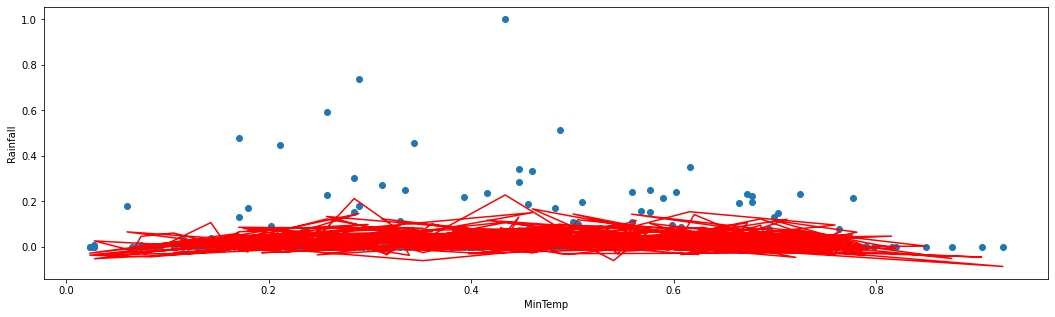

In [267]:
plt.figure(figsize=(18,5))
plt.scatter(df_sc['SinMinTemp'],df_sc['y_test'])
plt.plot(df_sc['SinMinTemp'],df_sc['y_pred'] , color="red")
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')

In [268]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.044243967797605005
R2 score is : 0.2751421198002012


In [ ]:
##################################################

In [276]:
df_sydney2

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
31241,2,20.5,29.0,420.25,841.00,8615.125,24389.000,0.345612,0.478734,39.0,...,1010.1,25.5,16581.375,19902.511,27.1,0.425000,0.449767,650.25,734.41,0.0
31576,3,16.0,25.3,256.00,640.09,4096.000,16194.277,0.271958,0.421881,41.0,...,1015.3,22.2,10941.048,15625.000,25.0,0.372921,0.417194,492.84,625.00,0.0
31911,4,20.2,26.2,408.04,686.44,8242.408,17984.728,0.340762,0.435877,30.0,...,1008.6,23.2,12487.168,13997.521,24.1,0.388838,0.403064,538.24,580.81,0.0
32613,6,21.4,28.4,457.96,806.56,9800.344,22906.304,0.360108,0.469640,43.0,...,1011.4,25.2,16003.008,20796.875,27.5,0.420320,0.455907,635.04,756.25,0.0
32978,7,17.9,25.6,320.41,655.36,5735.339,16777.216,0.303281,0.426558,35.0,...,1013.7,22.9,12008.989,14172.488,24.2,0.384075,0.404639,524.41,585.64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,3334,15.4,21.2,237.16,449.44,3652.264,9528.128,0.262005,0.356894,41.0,...,1024.8,18.7,6539.203,8120.601,20.1,0.316375,0.339143,349.69,404.01,0.0
31462,3338,12.2,14.8,148.84,219.04,1815.848,3241.792,0.208473,0.252023,46.0,...,1006.1,12.2,1815.848,2803.221,14.1,0.208473,0.240344,148.84,198.81,4.4
32134,3340,15.3,26.1,234.09,681.21,3581.577,17779.581,0.260343,0.434327,33.0,...,1014.0,21.1,9393.931,11390.625,22.5,0.355286,0.377708,445.21,506.25,0.0
32499,3341,12.2,23.1,148.84,533.61,1815.848,12326.391,0.208473,0.387251,41.0,...,1012.8,19.3,7189.057,8741.816,20.6,0.326156,0.347227,372.49,424.36,0.0


In [273]:
df_sydney2.insert(5 , "MinTemp^3" , (df_sydney['MinTemp']**3))
df_sydney2.insert(6 , "MaxTemp^3" , (df_sydney['MaxTemp']**3))

In [275]:
df_sydney2.insert(17 , "Temp9am^3" , (df_sydney['Temp9am']**3))
df_sydney2.insert(18 , "Temp3pm^3" , (df_sydney['Temp3pm']**3))

In [277]:
df_sydney2.dropna(inplace=True)

In [289]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.432836,0.630872,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.400853,0.553691,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.460554,0.620805,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.509595,0.543624,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.746269,0.402685,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.347548,0.184564,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.515991,0.483221,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.490405,0.422819,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [290]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [291]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [293]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [294]:
y_pred = regressor.predict(x_test)
y_pred

array([[-0.04034215],
       [ 0.03058285],
       [-0.03105995],
       [ 0.01266323],
       [ 0.05558388],
       [ 0.07670769],
       [ 0.06994036],
       [-0.00836405],
       [-0.01084036],
       [ 0.00672508],
       [ 0.03412973],
       [ 0.03841187],
       [ 0.04690413],
       [ 0.00622674],
       [-0.03900711],
       [ 0.01461673],
       [ 0.02821586],
       [ 0.05626563],
       [ 0.04943443],
       [ 0.16084791],
       [-0.00641178],
       [ 0.02124237],
       [-0.0151365 ],
       [ 0.08428134],
       [-0.01056594],
       [ 0.0182269 ],
       [ 0.07886807],
       [ 0.00711018],
       [ 0.04518846],
       [-0.02039632],
       [-0.00674569],
       [ 0.00825263],
       [ 0.02715771],
       [ 0.03214722],
       [ 0.00986804],
       [ 0.04445459],
       [ 0.04811135],
       [ 0.01043066],
       [ 0.11030747],
       [ 0.01084113],
       [ 0.0060186 ],
       [ 0.05764948],
       [-0.02042201],
       [ 0.02992455],
       [ 0.04568173],
       [ 0

In [295]:
x_test.insert(5 ,'y_test' ,y_test)
x_test.insert(6,'y_pred' ,y_pred)
x_test

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,MinTemp^3,MaxTemp^3,SinMinTemp,...,Pressure9am,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2
979,0.412152,0.778761,0.522876,0.659319,0.381506,0.000000,-0.040342,0.546335,0.265266,0.789657,...,0.564706,0.599147,0.640940,0.349142,0.250902,0.519608,0.665509,0.551022,0.482188,0.370424
633,0.262197,0.663717,0.454248,0.508985,0.313768,0.000000,0.030583,0.376802,0.204839,0.677190,...,0.336471,0.360341,0.580537,0.279831,0.207597,0.470588,0.605892,0.501372,0.412557,0.321691
478,0.197845,0.384956,0.385621,0.220818,0.251368,0.020101,-0.031060,0.117053,0.153556,0.397578,...,0.503529,0.599147,0.338926,0.091893,0.137653,0.375817,0.359853,0.403756,0.184370,0.235620
69,0.027537,0.730088,0.428105,0.593477,0.289367,0.000000,0.012663,0.469549,0.184266,0.742312,...,0.392941,0.511727,0.536913,0.235820,0.150712,0.395425,0.562324,0.424120,0.365399,0.252547
547,0.226878,0.384956,0.222222,0.220818,0.124280,0.013400,0.055584,0.117053,0.063845,0.397578,...,0.574118,0.646055,0.295302,0.070833,0.067538,0.245098,0.314331,0.265983,0.151752,0.134517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.765340,0.137168,0.169935,0.055120,0.090002,0.040201,0.093054,0.019447,0.043534,0.142726,...,0.103529,0.279318,0.063758,0.006938,0.050492,0.202614,0.068589,0.220521,0.022581,0.106056
1685,0.725831,0.119469,0.183007,0.046542,0.098281,0.020101,0.010133,0.015863,0.048270,0.124361,...,0.621176,0.710021,0.097315,0.012084,0.055463,0.215686,0.104559,0.234542,0.036719,0.114583
1489,0.638432,0.451327,0.379085,0.279657,0.245703,0.000000,0.008052,0.162052,0.149122,0.464948,...,0.545882,0.586354,0.369128,0.108522,0.127306,0.359477,0.391193,0.386723,0.208489,0.221865
1455,0.623466,0.318584,0.225490,0.168087,0.126525,0.115578,0.095250,0.080903,0.065239,0.329790,...,0.376471,0.405117,0.302013,0.073855,0.076298,0.264706,0.321353,0.286858,0.156600,0.148380


In [296]:
df_sc = x_test.sort_values(by='Ranged_Date')
df_sc

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,MinTemp^3,MaxTemp^3,SinMinTemp,...,Pressure9am,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.000000,0.016766,0.190004,0.196971,0.500691,...,0.503529,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208
6,0.002694,0.730088,0.473856,0.593477,0.332577,0.045226,0.052207,0.469549,0.221138,0.742312,...,0.468235,0.530917,0.583893,0.283422,0.244831,0.513072,0.609226,0.544437,0.416294,0.363760
10,0.004190,0.597345,0.503268,0.430602,0.361607,0.000000,0.009868,0.296974,0.247025,0.611463,...,0.562353,0.590618,0.543624,0.242274,0.250902,0.519608,0.569054,0.551022,0.372483,0.370424
11,0.004490,0.778761,0.640523,0.659319,0.510046,0.003350,-0.013716,0.546335,0.392286,0.789657,...,0.364706,0.390192,0.607383,0.309401,0.405196,0.660131,0.632492,0.689819,0.442883,0.526042
14,0.005986,0.716814,0.584967,0.576090,0.447392,0.000000,-0.016216,0.449920,0.328442,0.729338,...,0.320000,0.334755,0.614094,0.317099,0.285980,0.555556,0.639117,0.587041,0.450620,0.407986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.982341,0.318584,0.297386,0.168087,0.178982,0.006700,0.037410,0.080903,0.099848,0.329790,...,0.171765,0.277186,0.305369,0.075395,0.106196,0.323529,0.324861,0.349053,0.159046,0.192727
2233,0.982939,0.327434,0.513072,0.174765,0.371502,0.000000,-0.044703,0.085247,0.256045,0.338851,...,0.472941,0.445629,0.456376,0.166879,0.250902,0.519608,0.480849,0.551022,0.285235,0.370424
2246,0.988626,0.168142,0.212418,0.071177,0.117617,0.036851,0.081969,0.026626,0.059755,0.174821,...,0.595294,0.680171,0.218121,0.041369,0.052948,0.209150,0.233121,0.227535,0.100477,0.110294
2249,0.990422,0.429204,0.493464,0.259365,0.351822,0.000000,-0.008076,0.146009,0.238201,0.442541,...,0.543529,0.522388,0.463087,0.172046,0.263324,0.532680,0.487688,0.564159,0.291573,0.383904


Text(0, 0.5, 'Rainfall')

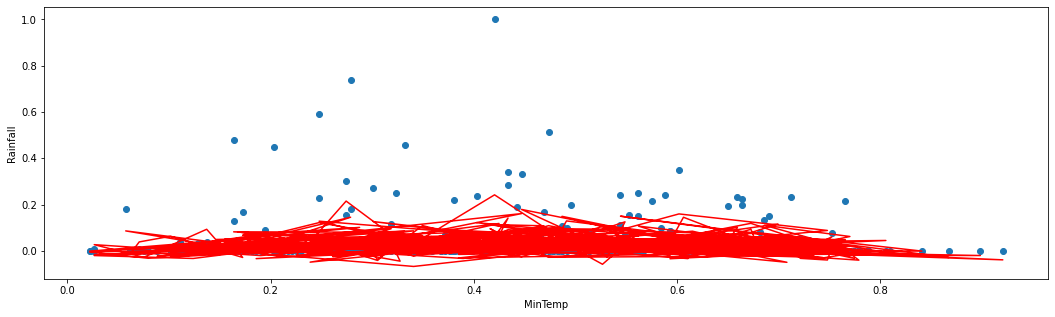

In [297]:
plt.figure(figsize=(18,5))
plt.scatter(df_sc['MinTemp'],df_sc['y_test'])
plt.plot(df_sc['MinTemp'],df_sc['y_pred'] , color="red")
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')

In [298]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.04391795331350449
R2 score is : 0.27851120944923247


In [ ]:
#######################################################

In [309]:
df_sydney2.insert(10 , "WGS^2" , (df_sydney['WindGustSpeed']**2))
df_sydney2.insert(11 , "WS9am^2" , (df_sydney['WindSpeed9am']**2))
df_sydney2.insert(11 , "WS3pm^2" , (df_sydney['WindSpeed3pm']**2))

In [312]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.432836,0.630872,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.400853,0.553691,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.460554,0.620805,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.509595,0.543624,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.746269,0.402685,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.347548,0.184564,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.515991,0.483221,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.490405,0.422819,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [313]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [314]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [315]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [316]:
y_pred = regressor.predict(x_test)
y_pred

array([[-4.40396065e-02],
       [ 2.95547981e-02],
       [-2.90446462e-02],
       [ 8.41499858e-03],
       [ 5.74612225e-02],
       [ 7.20851206e-02],
       [ 6.91698521e-02],
       [-1.03744830e-02],
       [-2.14564870e-02],
       [ 6.44645261e-03],
       [ 3.37212864e-02],
       [ 3.59274021e-02],
       [ 4.25155735e-02],
       [ 1.59267393e-03],
       [-2.78477684e-02],
       [ 1.23200248e-02],
       [ 2.42054430e-02],
       [ 5.31702331e-02],
       [ 4.83041422e-02],
       [ 1.59377710e-01],
       [-1.20403231e-02],
       [ 1.84798923e-02],
       [-1.59469381e-02],
       [ 8.11722887e-02],
       [-1.37668794e-02],
       [ 2.30117908e-02],
       [ 7.84667574e-02],
       [ 1.48155246e-02],
       [ 4.40359304e-02],
       [-2.54073815e-02],
       [-6.52018430e-03],
       [ 5.67593960e-03],
       [ 2.75165504e-02],
       [ 2.81732290e-02],
       [ 1.13634899e-02],
       [ 5.07769879e-02],
       [ 5.21650091e-02],
       [ 6.93970484e-03],
       [ 1.0

In [318]:
x_test.insert(5 ,'y_test' ,y_test)
x_test.insert(6,'y_pred' ,y_pred)
x_test

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,MinTemp^3,MaxTemp^3,SinMinTemp,...,Pressure9am,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2
979,0.412152,0.778761,0.522876,0.659319,0.381506,0.000000,-0.044040,0.546335,0.265266,0.789657,...,0.564706,0.599147,0.640940,0.349142,0.250902,0.519608,0.665509,0.551022,0.482188,0.370424
633,0.262197,0.663717,0.454248,0.508985,0.313768,0.000000,0.029555,0.376802,0.204839,0.677190,...,0.336471,0.360341,0.580537,0.279831,0.207597,0.470588,0.605892,0.501372,0.412557,0.321691
478,0.197845,0.384956,0.385621,0.220818,0.251368,0.020101,-0.029045,0.117053,0.153556,0.397578,...,0.503529,0.599147,0.338926,0.091893,0.137653,0.375817,0.359853,0.403756,0.184370,0.235620
69,0.027537,0.730088,0.428105,0.593477,0.289367,0.000000,0.008415,0.469549,0.184266,0.742312,...,0.392941,0.511727,0.536913,0.235820,0.150712,0.395425,0.562324,0.424120,0.365399,0.252547
547,0.226878,0.384956,0.222222,0.220818,0.124280,0.013400,0.057461,0.117053,0.063845,0.397578,...,0.574118,0.646055,0.295302,0.070833,0.067538,0.245098,0.314331,0.265983,0.151752,0.134517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.765340,0.137168,0.169935,0.055120,0.090002,0.040201,0.083107,0.019447,0.043534,0.142726,...,0.103529,0.279318,0.063758,0.006938,0.050492,0.202614,0.068589,0.220521,0.022581,0.106056
1685,0.725831,0.119469,0.183007,0.046542,0.098281,0.020101,0.020779,0.015863,0.048270,0.124361,...,0.621176,0.710021,0.097315,0.012084,0.055463,0.215686,0.104559,0.234542,0.036719,0.114583
1489,0.638432,0.451327,0.379085,0.279657,0.245703,0.000000,0.002434,0.162052,0.149122,0.464948,...,0.545882,0.586354,0.369128,0.108522,0.127306,0.359477,0.391193,0.386723,0.208489,0.221865
1455,0.623466,0.318584,0.225490,0.168087,0.126525,0.115578,0.093604,0.080903,0.065239,0.329790,...,0.376471,0.405117,0.302013,0.073855,0.076298,0.264706,0.321353,0.286858,0.156600,0.148380


In [319]:
df_sc = x_test.sort_values(by='Ranged_Date')
df_sc

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,y_test,y_pred,MinTemp^3,MaxTemp^3,SinMinTemp,...,Pressure9am,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.000000,0.014096,0.190004,0.196971,0.500691,...,0.503529,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208
6,0.002694,0.730088,0.473856,0.593477,0.332577,0.045226,0.050666,0.469549,0.221138,0.742312,...,0.468235,0.530917,0.583893,0.283422,0.244831,0.513072,0.609226,0.544437,0.416294,0.363760
10,0.004190,0.597345,0.503268,0.430602,0.361607,0.000000,0.011363,0.296974,0.247025,0.611463,...,0.562353,0.590618,0.543624,0.242274,0.250902,0.519608,0.569054,0.551022,0.372483,0.370424
11,0.004490,0.778761,0.640523,0.659319,0.510046,0.003350,-0.013952,0.546335,0.392286,0.789657,...,0.364706,0.390192,0.607383,0.309401,0.405196,0.660131,0.632492,0.689819,0.442883,0.526042
14,0.005986,0.716814,0.584967,0.576090,0.447392,0.000000,-0.008699,0.449920,0.328442,0.729338,...,0.320000,0.334755,0.614094,0.317099,0.285980,0.555556,0.639117,0.587041,0.450620,0.407986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.982341,0.318584,0.297386,0.168087,0.178982,0.006700,0.039958,0.080903,0.099848,0.329790,...,0.171765,0.277186,0.305369,0.075395,0.106196,0.323529,0.324861,0.349053,0.159046,0.192727
2233,0.982939,0.327434,0.513072,0.174765,0.371502,0.000000,-0.040195,0.085247,0.256045,0.338851,...,0.472941,0.445629,0.456376,0.166879,0.250902,0.519608,0.480849,0.551022,0.285235,0.370424
2246,0.988626,0.168142,0.212418,0.071177,0.117617,0.036851,0.080410,0.026626,0.059755,0.174821,...,0.595294,0.680171,0.218121,0.041369,0.052948,0.209150,0.233121,0.227535,0.100477,0.110294
2249,0.990422,0.429204,0.493464,0.259365,0.351822,0.000000,-0.010440,0.146009,0.238201,0.442541,...,0.543529,0.522388,0.463087,0.172046,0.263324,0.532680,0.487688,0.564159,0.291573,0.383904


Text(0, 0.5, 'Rainfall')

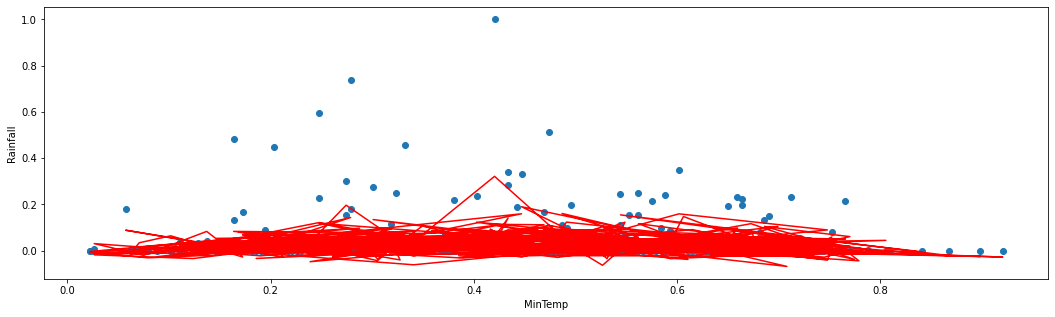

In [320]:
plt.figure(figsize=(18,5))
plt.scatter(df_sc['MinTemp'],df_sc['y_test'])
plt.plot(df_sc['MinTemp'],df_sc['y_pred'] , color="red")
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')

In [321]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.04342427830299167
R2 score is : 0.3064900424583792


In [ ]:
###############################################################

In [330]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 0)

In [331]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [332]:
y_pred = regressor.predict(x_test)
y_pred

array([[-4.50035320e-02],
       [ 3.08845176e-02],
       [-2.97797811e-02],
       [ 8.31583129e-03],
       [ 5.86052667e-02],
       [ 7.19376865e-02],
       [ 7.15965637e-02],
       [-1.30012625e-02],
       [-1.98501322e-02],
       [ 5.49906707e-03],
       [ 3.34896226e-02],
       [ 3.74004357e-02],
       [ 4.13645235e-02],
       [-8.88137631e-05],
       [-2.80635398e-02],
       [ 1.36650518e-02],
       [ 2.58985582e-02],
       [ 5.58799336e-02],
       [ 5.05096924e-02],
       [ 1.69418603e-01],
       [-1.25773277e-02],
       [ 1.83452715e-02],
       [-1.54399703e-02],
       [ 8.39650806e-02],
       [-1.24095064e-02],
       [ 2.27429892e-02],
       [ 8.24365391e-02],
       [ 1.64037008e-02],
       [ 4.54502057e-02],
       [-2.57856071e-02],
       [-7.70252949e-03],
       [ 3.50515319e-03],
       [ 2.97500886e-02],
       [ 2.92095085e-02],
       [ 1.06671609e-02],
       [ 5.21263023e-02],
       [ 5.44350292e-02],
       [ 7.57236041e-03],
       [ 1.1

In [333]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.040362227415388106
R2 score is : 0.2933938491454886


In [334]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [335]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [336]:
y_pred = regressor.predict(x_test)
y_pred

array([[-4.01624263e-02],
       [ 2.94231870e-02],
       [-2.80047757e-02],
       [ 8.25404505e-03],
       [ 5.61717307e-02],
       [ 6.92346616e-02],
       [ 6.66978420e-02],
       [-9.01366869e-03],
       [-2.21040711e-02],
       [ 5.91804378e-03],
       [ 3.13176715e-02],
       [ 3.67739240e-02],
       [ 3.97636563e-02],
       [ 1.41287215e-03],
       [-2.68992578e-02],
       [ 1.18790569e-02],
       [ 2.36530669e-02],
       [ 5.34378872e-02],
       [ 4.80249541e-02],
       [ 1.56471606e-01],
       [-1.36297753e-02],
       [ 1.82975391e-02],
       [-1.60235716e-02],
       [ 7.84186882e-02],
       [-1.07255976e-02],
       [ 2.34776628e-02],
       [ 7.72591819e-02],
       [ 1.45331170e-02],
       [ 4.18937599e-02],
       [-2.34857252e-02],
       [-7.82521193e-03],
       [ 3.52339232e-03],
       [ 2.56072661e-02],
       [ 2.73834947e-02],
       [ 1.05489529e-02],
       [ 5.03353073e-02],
       [ 5.21567143e-02],
       [ 6.77377978e-03],
       [ 1.0

In [337]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.04809146651552583
R2 score is : 0.325726352396983


In [ ]:
########################################################

In [340]:
df_sydney2.columns.get_loc("Humidity9am")
df_sydney2.columns.get_loc("Humidity3pm")

16

In [341]:
df_sydney2.insert(16 , "Humidity9am^2" , (df_sydney['Humidity9am']**2))
df_sydney2.insert(17 , "Humidity3pm^2" , (df_sydney['Humidity3pm']**2))

In [342]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Pressure9am','Pressure3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Pressure3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.432836,0.630872,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.400853,0.553691,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.460554,0.620805,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.509595,0.543624,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.746269,0.402685,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.347548,0.184564,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.515991,0.483221,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.490405,0.422819,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [343]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity3pm','Humidity9am^2','Humidity3pm^2','Pressure9am','Pressure3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [344]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [345]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [346]:
y_pred = regressor.predict(x_test)
y_pred

array([[-4.37869515e-02],
       [ 2.83036822e-02],
       [ 4.50505554e-02],
       [ 1.30314063e-03],
       [ 5.51327615e-02],
       [ 7.28113818e-02],
       [ 5.66450398e-02],
       [-1.01230662e-02],
       [ 2.11116301e-02],
       [-3.42070011e-03],
       [ 2.42104368e-02],
       [ 3.29975877e-02],
       [ 4.30194064e-02],
       [-2.66527375e-03],
       [-5.19043331e-02],
       [ 6.57202042e-04],
       [ 8.55096760e-03],
       [ 3.36121922e-02],
       [ 3.88695317e-02],
       [ 1.81489019e-01],
       [ 1.27828040e-02],
       [ 1.48895071e-02],
       [-2.12506532e-02],
       [ 5.76037019e-02],
       [-2.91572989e-03],
       [ 3.36890218e-02],
       [ 8.46229599e-02],
       [ 3.48658668e-03],
       [ 4.91550781e-02],
       [-1.37228728e-02],
       [-8.37637755e-03],
       [ 1.04804491e-03],
       [ 2.85300244e-02],
       [ 1.60485509e-02],
       [ 4.23413282e-03],
       [ 4.88256752e-02],
       [ 7.84162510e-02],
       [-2.35769775e-03],
       [ 1.4

In [347]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.041825246154042206
R2 score is : 0.3183928387175402


In [ ]:
#####################################################

In [348]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 0)

In [349]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [350]:
y_pred = regressor.predict(x_test)

In [351]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.038872239278923915
R2 score is : 0.30345522914498724


In [ ]:
##############################################################

In [352]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [353]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [354]:
y_pred = regressor.predict(x_test)

In [355]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.04609714706803125
R2 score is : 0.3335274278404202


In [ ]:
##############################################################

In [358]:
df_sydney2.columns.get_loc("Pressure9am")
#df_sydney2.columns.get_loc("Pressure3pm")

19

In [359]:
df_sydney2.insert(20 , "Pressure9am^2" , (df_sydney['Pressure9am']**2))
df_sydney2.insert(21 , "Pressure3pm^2" , (df_sydney['Pressure3pm']**2))

In [361]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Pressure3pm^2,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.432836,0.630872,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.400853,0.553691,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.460554,0.620805,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.509595,0.543624,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.746269,0.402685,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.347548,0.184564,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.515991,0.483221,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.490405,0.422819,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [362]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity3pm','Humidity9am^2','Humidity3pm^2','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [363]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [364]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [365]:
y_pred = regressor.predict(x_test)

In [366]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.041947178131189033
R2 score is : 0.31594745753190934


In [ ]:
#########################################################

In [367]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 0)

In [368]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [369]:
y_pred = regressor.predict(x_test)

In [370]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.03892569028859313
R2 score is : 0.3007041970861817


In [ ]:
##############################################################

In [371]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [372]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [373]:
y_pred = regressor.predict(x_test)

In [374]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.046170681291538264
R2 score is : 0.33293537335902545


In [ ]:
#######################################################

In [375]:
Sinpre9am = np.sin((2*np.pi*df_sydney2.Pressure9am)/365)
Sinpre3pm = np.sin((2*np.pi*df_sydney2.Pressure3pm)/365)

In [376]:
df_sydney2.insert(22,"Sinpre9am" , Sinpre9am)
df_sydney2.insert(23,"Sinpre3pm" , Sinpre3pm)

In [378]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Sinpre3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.432836,0.630872,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.543710,0.520134,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.400853,0.553691,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.460554,0.620805,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.509595,0.543624,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.746269,0.402685,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.347548,0.184564,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.515991,0.483221,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.490405,0.422819,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [379]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity3pm','Humidity9am^2','Humidity3pm^2','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [380]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [381]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [382]:
y_pred = regressor.predict(x_test)

In [383]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.04612605871226596
R2 score is : 0.3305177641517052


In [ ]:
######################################################

In [384]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [385]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [386]:
y_pred = regressor.predict(x_test)

In [387]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.041944843258947345
R2 score is : 0.3134114884368693


In [ ]:
###############################################################################

In [388]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 0)

In [389]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [390]:
y_pred = regressor.predict(x_test)

In [391]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.038784621983348616
R2 score is : 0.29981519043381233


In [ ]:
###############################################################

In [396]:
df_sydney2.insert(26,"Hu9am^3" ,(df_sydney['Humidity9am']**3) )
df_sydney2.insert(27,"Hum3pm^3" ,(df_sydney['Humidity3pm']**3) )

In [398]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Sinpre3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.323871,0.200260,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.169922,0.113063,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.338463,0.323359,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.309697,0.337882,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.179566,0.144030,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.323871,0.309258,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.548270,0.309258,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.338463,0.337882,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.169922,0.180147,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [482]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [483]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [484]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [485]:
y_pred = regressor.predict(x_test)

In [486]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.044164602145221
R2 score is : 0.3006886033247783


In [ ]:
##############################################################

In [424]:
correlation1 = np.corrcoef(df_sydney2.WindSpeed9am , df_sydney2.Rainfall)
correlation1

array([[1.        , 0.16759987],
       [0.16759987, 1.        ]])

In [ ]:
## humidity9am >> humidity3pm >> windgustspeed >> windspeed9am>> Temp3pm >> maxtemp

In [431]:
df_sydney2.insert(18 , "Humidity9am^4" , (df_sydney['Humidity9am']**4))
df_sydney2.insert(19 , "Humidity3pm^4" , (df_sydney['Humidity3pm']**4))

ValueError: cannot insert Humidity9am^4, already exists

In [437]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Sinpre3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.323871,0.200260,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.169922,0.113063,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.338463,0.323359,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.309697,0.337882,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.179566,0.144030,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.323871,0.309258,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.548270,0.309258,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.338463,0.337882,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.169922,0.180147,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [439]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [440]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [441]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [442]:
y_pred = regressor.predict(x_test)

In [444]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.04374382566908037
R2 score is : 0.3449198890063181


In [446]:
df_sydney2.insert(15 , "WindGustSpeed^3" , (df_sydney['WindGustSpeed']**3))
df_sydney2.insert(16 , "WindSpeed9am^3" , (df_sydney['WindSpeed9am']**3))

In [447]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindGustSpeed^3','WindSpeed9am^3','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Sinpre3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.323871,0.200260,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.169922,0.113063,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.338463,0.323359,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.309697,0.337882,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.179566,0.144030,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.323871,0.309258,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.548270,0.309258,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.338463,0.337882,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.169922,0.180147,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [448]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindGustSpeed^3','WindSpeed9am^3','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [453]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [454]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [455]:
y_pred = regressor.predict(x_test)

In [456]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.044299776101922685
R2 score is : 0.29697036429635404


In [ ]:
###############################################################################

In [458]:
Humidity_m = df_sydney2['Humidity9am']*df_sydney2['Humidity3pm']

In [460]:
df_sydney2.insert(22 , "mul_hum" ,Humidity_m )

In [461]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindGustSpeed^3','WindSpeed9am^3','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','mul_hum','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Sinpre3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.323871,0.200260,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.169922,0.113063,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.338463,0.323359,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.309697,0.337882,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.179566,0.144030,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.323871,0.309258,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.548270,0.309258,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.338463,0.337882,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.169922,0.180147,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [464]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','mul_hum','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [465]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [466]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [467]:
y_pred = regressor.predict(x_test)

In [468]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))



MAE is : 0.04563100696913356
R2 score is : 0.2790923908864855


In [ ]:
##############################################################

In [473]:
df_sydney2.insert(21 , "Humidity9am^5" ,df_sydney['Humidity9am']**5 )

In [474]:
df_sydney2.insert(22 , "Humidity3pm^5" ,df_sydney['Humidity3pm']**5 )

In [475]:
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
norm = scaler.fit_transform(df_sydney2)
norm_df = pd.DataFrame(norm ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindGustSpeed^3','WindSpeed9am^3','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','Humidity9am^5','Humidity3pm^5','mul_hum','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2','Rainfall'])
norm_df

,Ranged_Date,MinTemp,MaxTemp,MinTemp^2,MaxTemp^2,MinTemp^3,MaxTemp^3,SinMinTemp,SinMaxTemp,WindGustSpeed,...,Sinpre3pm,Temp9am,Temp9am^3,Temp3pm^3,Temp3pm,SinTemp9am,SinTemp3pm,Temp9am^2,Temp3pm^2,Rainfall
0,0.000000,0.685841,0.565359,0.536470,0.426114,0.406234,0.307583,0.698967,0.598745,0.278481,...,0.323871,0.200260,0.336889,0.279387,0.549020,0.655632,0.580518,0.470234,0.401042,0.000000
1,0.000299,0.486726,0.444444,0.313535,0.304527,0.190004,0.196971,0.500691,0.476601,0.303797,...,0.169922,0.113063,0.220176,0.215852,0.480392,0.545459,0.511350,0.347960,0.331208,0.000000
2,0.000599,0.672566,0.473856,0.519898,0.332577,0.388401,0.221138,0.685909,0.506669,0.164557,...,0.338463,0.323359,0.252169,0.191679,0.450980,0.579130,0.481347,0.383226,0.303002,0.000000
3,0.001197,0.725664,0.545752,0.587654,0.405271,0.462945,0.287570,0.737990,0.579209,0.329114,...,0.309697,0.337882,0.324921,0.292671,0.562092,0.645730,0.593554,0.458419,0.414982,0.000000
4,0.001497,0.570796,0.454248,0.400958,0.313768,0.268443,0.204839,0.585012,0.486648,0.227848,...,0.179566,0.144030,0.242274,0.194277,0.454248,0.569054,0.484691,0.372483,0.306085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.997306,0.460177,0.310458,0.287964,0.189149,0.168772,0.106992,0.473896,0.336979,0.303797,...,0.323871,0.309258,0.129090,0.104387,0.320261,0.425836,0.345615,0.236764,0.190155,0.000000
2267,0.998503,0.318584,0.101307,0.168087,0.049716,0.080903,0.022139,0.329790,0.111668,0.367089,...,0.548270,0.309258,0.031351,0.025406,0.124183,0.197572,0.135825,0.080747,0.059181,0.036851
2268,0.999102,0.455752,0.470588,0.283797,0.329412,0.165390,0.218369,0.469423,0.503339,0.202532,...,0.338463,0.337882,0.188162,0.152958,0.398693,0.508152,0.427505,0.310962,0.255413,0.000000
2269,0.999401,0.318584,0.372549,0.168087,0.240087,0.080903,0.144762,0.329790,0.402199,0.303797,...,0.169922,0.180147,0.142537,0.113614,0.336601,0.446528,0.362782,0.254474,0.203144,0.000000


In [476]:
x = pd.DataFrame(norm_df ,columns = ['Ranged_Date','MinTemp' , 'MaxTemp', 'MinTemp^2','MaxTemp^2','MinTemp^3','MaxTemp^3','SinMinTemp','SinMaxTemp','WindGustSpeed','WGS^2','WindSpeed9am','WS9am^2','WS3pm^2','WindSpeed3pm','Humidity9am','Humidity9am^2','Humidity3pm','Humidity3pm^2','Hu9am^3','Hum3pm^3','Humidity9am^4','Humidity3pm^4','Humidity9am^5','Humidity3pm^5','mul_hum','Pressure9am','Pressure9am^2','Pressure3pm','Pressure3pm^2','Sinpre9am','Sinpre3pm','Temp9am','Temp9am^3','Temp3pm^3','Temp3pm','SinTemp9am','SinTemp3pm' ,'Temp9am^2','Temp3pm^2'] )
y = norm_df['Rainfall'].values.reshape(-1,1)

In [477]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.1 , random_state = 0)

In [478]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [479]:
y_pred = regressor.predict(x_test)

In [480]:
print("MAE is :" , metrics.mean_absolute_error(y_test,y_pred))
print("R2 score is :" , metrics.r2_score(y_test,y_pred))

MAE is : 0.0458329176620857
R2 score is : 0.2634743560820163
